# **Market Insider - Data Science Batch 38**
### **Anggota:**
1. Achmad Hilman Shadiqin
2. Figo Akmal Munir
3. Andreawan Sofian
4. Nabilah Astiarini
5. Dzakwan Darussalam
6. Riyan Maula


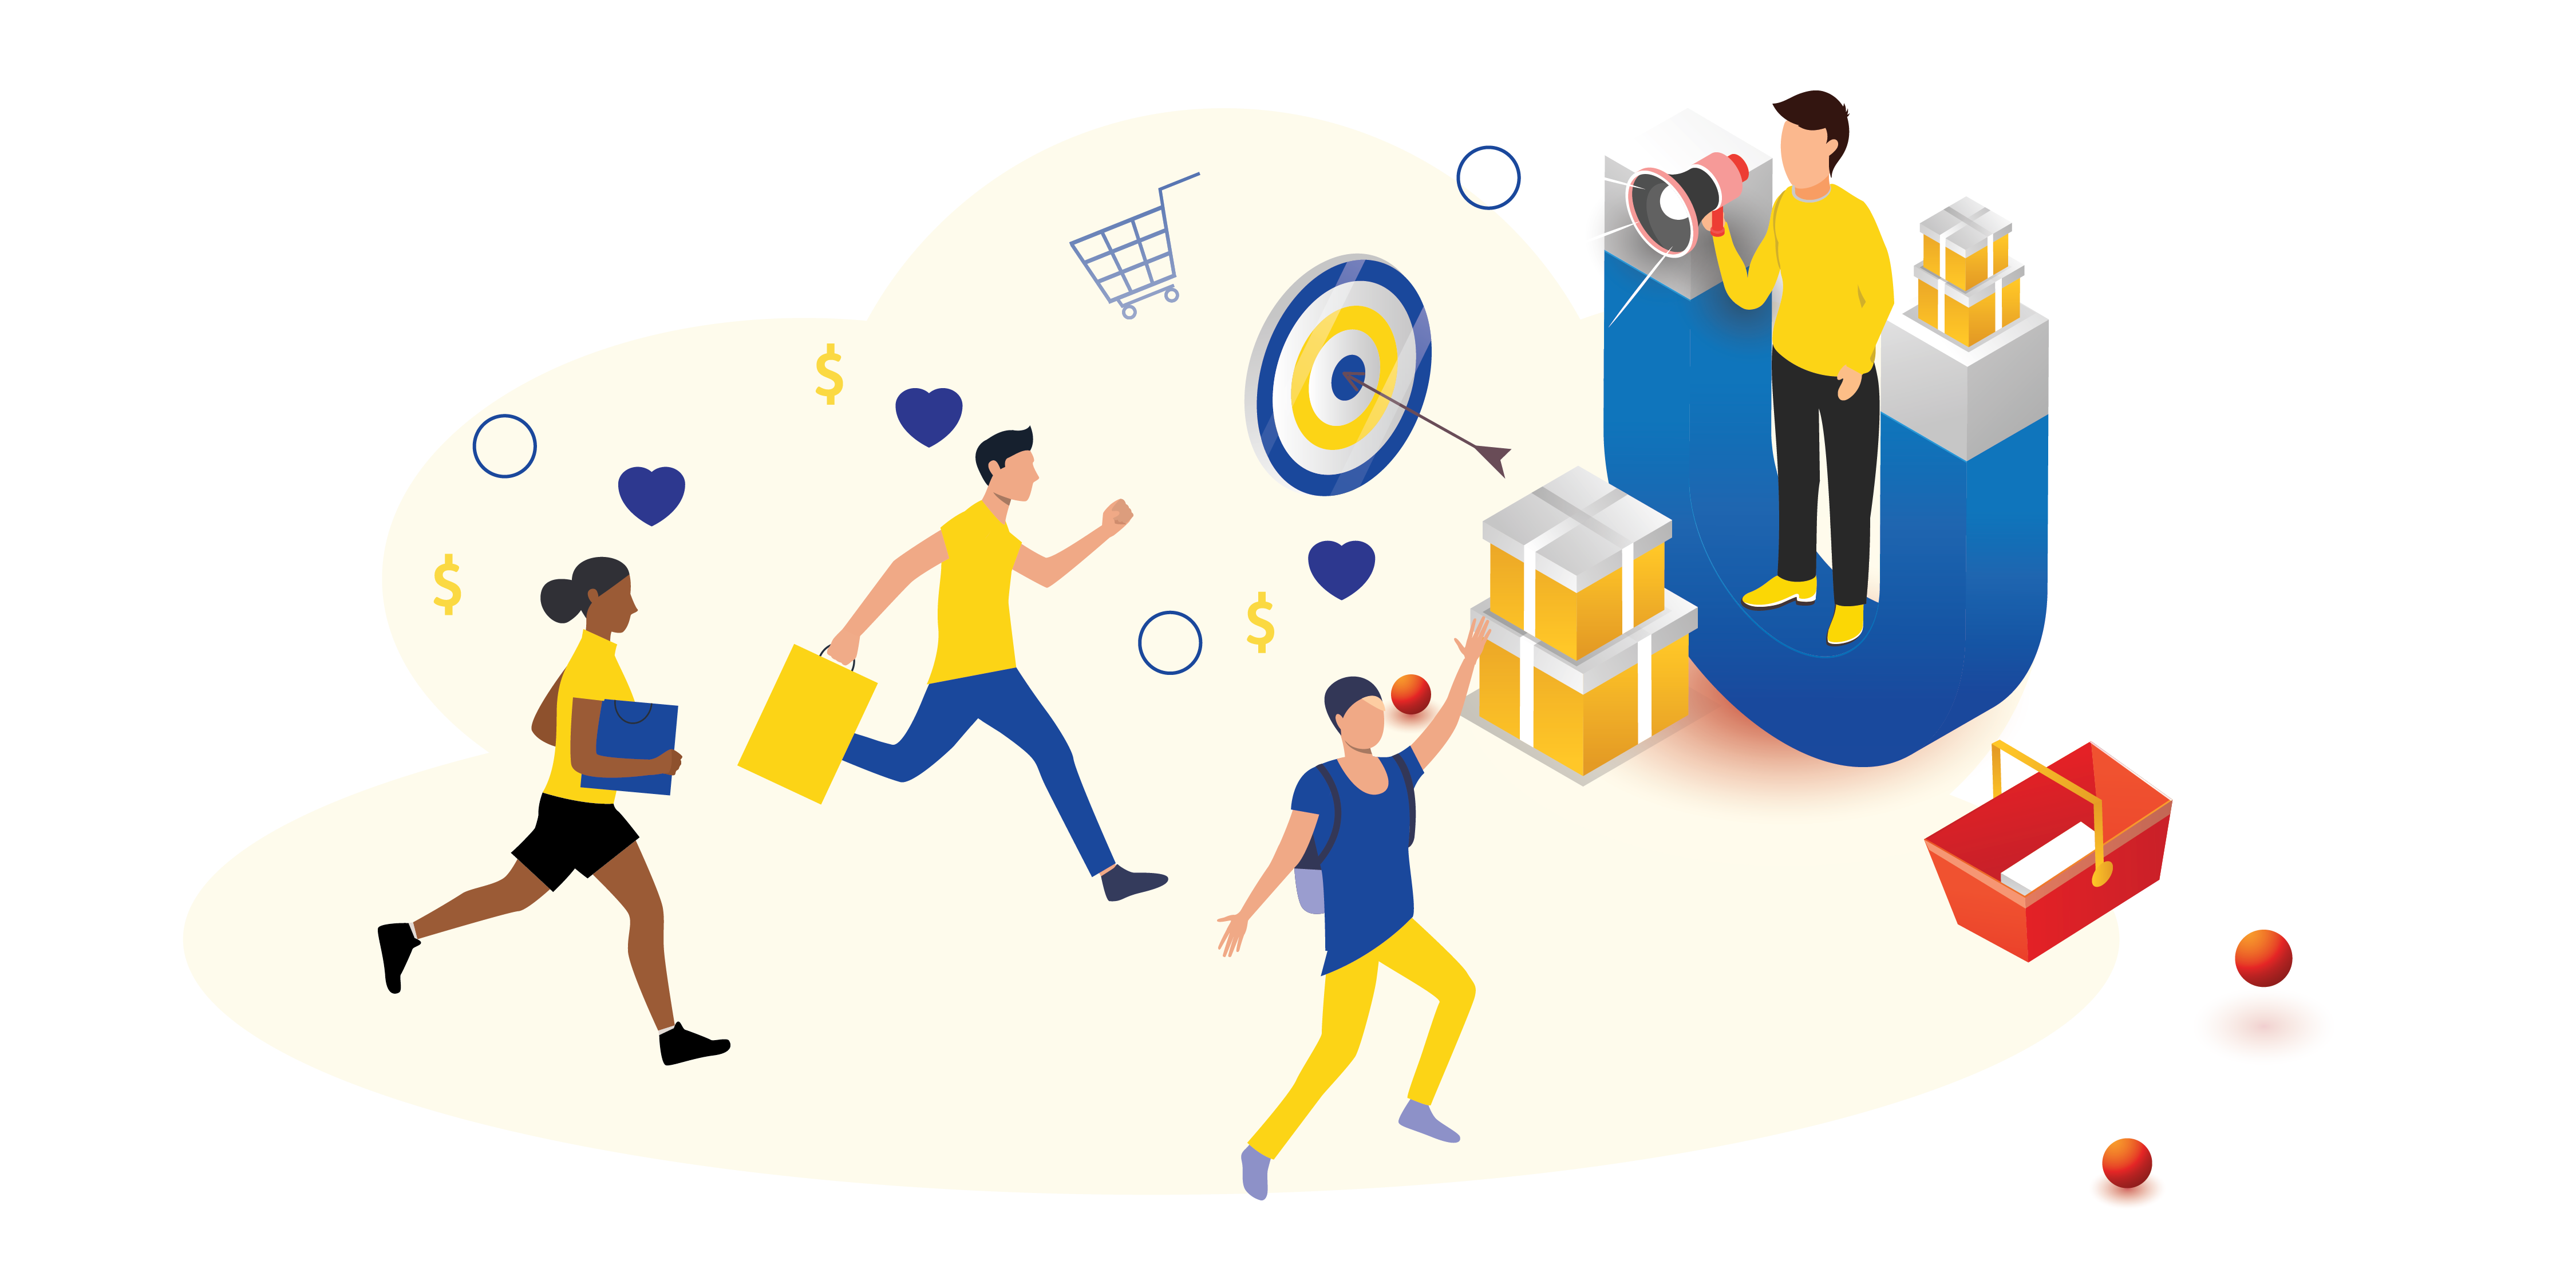

### **Table of Contents** <a id=100></a>
1. [Introduction](#1)
2. [Imports](#2)
3. [EDA + Insights](#3)
    - 3.1 [Descriptive Statistics](#3.1)
    - 3.2 [Univariate Analysis](#3.2)
    - 3.3 [Multivariate Analysis](#3.3)
    - 3.3 [Business Insights](#3.4)
4. [Data Pre-Processing](#4)
    - 4.1 [Handling Missing Values](#4.1)
    - 4.2 [Handling Duplicates Values](#4.2)
    - 4.3 [Handling Outliers](#4.3)
    - 4.4 [Feature Extraction](#4.4)
    - 4.5 [Feature Transformation](#4.5)
    - 4.6 [Feature Selection](#4.6)
5. [Machine Learning Modelling & Evaluation](#5)
    - 5.1 [Modeling](#5.1)
    - 5.2 [Evaluation](#5.2)
6. [Summary](#6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import os
import sys

notebook_path = '/content/drive/MyDrive/Final Project/Final Project - Marketing Campaign/'
sys.path.append(notebook_path)
warnings.filterwarnings('ignore')
print(os.listdir(notebook_path))

['marketing_campaign.csv', 'Final Project - Marketing Campaign.ipynb']


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **1. Introduction** <a id=1></a>
[back to top](#100)

### **Problem Statement**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

### **Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumDealsPurchases: Number of purchases made with a discount
* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

### **Acknowledgements**
O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

### **Inspiration**
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

# **2. Imports** <a id=2></a>
[back to top](#100)

In [ ]:
# import dan backup raw dataset
raw_data = pd.read_csv(notebook_path+'marketing_campaign.csv', sep=';')
data = raw_data.copy()
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# **3. EDA** <a id=3></a>
[back to top](#100)


## **3.1 Descriptive Statistics** <a id=3.1></a>

In [ ]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# total unique values setiap feature
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# membuat function untuk mengidentifikasi data terduplikasi
def identify_duplicates(df):
    """
    Identify duplicated rows in a DataFrame and return a summary.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame containing information about duplicated rows.
    """
    # mencari baris yang terduplikasi
    duplicate_rows = df[df.duplicated()]

    # menghitng jumlah row yang terduplikasi
    duplicate_count = len(duplicate_rows)

    # membuat dataframe untuk menampilkan jumlah row beserta persentase data yang terduplikasi
    if duplicate_count > 0:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [duplicate_count],
            'percentage': round((duplicate_count / len(df) * 100), 2)
        })
    else:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [0],
            'percentage': [0.0]
        })

    return duplicate_info

In [ ]:
# menampikan data shape dan memanggil function untuk mengidentikasi data yang terduplikasi
identify_duplicates(data)

duplicated rows  percentage
0              182        8.12

In [ ]:
# menampilkan row data terduplikasi
data[data.duplicated()][['Education','Marital_Status','Income']].sort_values(by=['Education','Marital_Status','Income'])

Education Marital_Status   Income
1501  2n Cycle       Divorced  31163.0
1107  2n Cycle        Married  15315.0
1171  2n Cycle        Married  20130.0
383   2n Cycle        Married  35688.0
2015  2n Cycle        Married  37284.0
...        ...            ...      ...
1218       PhD       Together  68682.0
2062       PhD       Together  70038.0
1630       PhD       Together  73059.0
1959       PhD          Widow  56551.0
2217       PhD          Widow  82032.0

[182 rows x 3 columns]

In [ ]:
# drop columns yang tidak terpakai, karena nilai pada kolom semuanya unique sehingga tidak bisa di track journey dari pelanggan (ID) nilai pada kolom hanya memiliki 1 nilai unique (Z_CostContact, Z_Revenue)
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
# mengubah tipe data Dt_customer dari object menjadi datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [ ]:
# memisahkan feature berdasarkan tipe data
numeric_cols = []
object_cols = []
datetime_cols = []

# melakukan perulangan setiap feature sesuai dengan tipe data
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        numeric_cols.append(col)
    elif data[col].dtype == 'object':
        object_cols.append(col)
    else:
        datetime_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(numeric_cols)}')
print(f'Total Object Columns  : {len(object_cols)}')
print(f'Total Datetime Columns: {len(datetime_cols)}')

Total Numeric Columns : 23
Total Object Columns  : 2
Total Datetime Columns: 1


In [ ]:
# memisahkan feature berdasarkan klasifikasinya
personal_cols = []
spending_cols = []
purchase_cols = []
campaign_cols = []

# melakukan perulangan setiap feature sesuai dengan klasifikasinya
for col in data.columns:
    if col in 'Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain':
        personal_cols.append(col)
    elif col in 'MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds':
        spending_cols.append(col)
    elif col in 'NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth':
        purchase_cols.append(col)
    elif col in 'AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumDealsPurchases':
        campaign_cols.append(col)

# mengurutkan hasilnya sesuai dengan alphabet
personal_cols.sort()
spending_cols.sort()
purchase_cols.sort()
campaign_cols.sort()

# print hasilnya yang disimpan pada masing-masing feature
print(f'Personal Columns: {personal_cols}')
print(f'Spending Columns: {spending_cols}')
print(f'Purchase Columns: {purchase_cols}')
print(f'Campaign Columns: {campaign_cols}')

Personal Columns: ['Complain', 'Dt_Customer', 'Education', 'Income', 'Kidhome', 'Marital_Status', 'Recency', 'Teenhome', 'Year_Birth']
Spending Columns: ['MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']
Purchase Columns: ['NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
Campaign Columns: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


In [ ]:
# descriptive statistics pada feature bertipe data numerik
data[numeric_cols].describe(percentiles=list(np.linspace(0.1, 0.9,9))).T

count          mean           std     min      10%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1952.0   
Income               2216.0  52247.251354  25173.076661  1730.0  24117.5   
Kidhome              2240.0      0.444196      0.538398     0.0      0.0   
Teenhome             2240.0      0.506250      0.544538     0.0      0.0   
Recency              2240.0     49.109375     28.962453     0.0      9.0   
MntWines             2240.0    303.935714    336.597393     0.0      6.0   
MntFruits            2240.0     26.302232     39.773434     0.0      0.0   
MntMeatProducts      2240.0    166.950000    225.715373     0.0      7.0   
MntFishProducts      2240.0     37.525446     54.628979     0.0      0.0   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      0.0   
MntGoldProds         2240.0     44.021875     52.167439     0.0      3.0   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.0   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      1.0   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.0   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      2.0   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      2.0   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.0   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.0   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.0   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.0   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.0   
Complain             2240.0      0.009375      0.096391     0.0      0.0   
Response             2240.0      0.149107      0.356274     0.0      0.0   

                         20%      30%      40%      50%      60%      70%  \
Year_Birth            1957.0   1962.0   1966.0   1970.0   1973.0   1976.0   
Income               32011.0  38198.5  44529.0  51381.5  58482.0  65247.5   
Kidhome                  0.0      0.0      0.0      0.0      1.0      1.0   
Teenhome                 0.0      0.0      0.0      0.0      1.0      1.0   
Recency                 19.0     29.0     39.0     49.0     59.0     69.0   
MntWines                16.0     34.0     81.0    173.5    284.4    418.6   
MntFruits                1.0      2.0      4.0      8.0     15.0     25.0   
MntMeatProducts         12.0     20.0     35.0     67.0    108.4    177.0   
MntFishProducts          2.0      3.0      7.0     12.0     20.0     37.0   
MntSweetProducts         1.0      2.0      5.0      8.0     14.0     26.0   
MntGoldProds             6.0     11.0     17.0     24.0     34.0     46.0   
NumDealsPurchases        1.0      1.0      1.0      2.0      2.0      3.0   
NumWebPurchases          2.0      2.0      3.0      4.0      4.0      5.0   
NumCatalogPurchases      0.0      1.0      1.0      2.0      2.0      4.0   
NumStorePurchases        3.0      3.0      4.0      5.0      6.0      7.0   
NumWebVisitsMonth        3.0      4.0      5.0      6.0      6.0      7.0   
AcceptedCmp3             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp4             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp5             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp1             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp2             0.0      0.0      0.0      0.0      0.0      0.0   
Complain                 0.0      0.0      0.0      0.0      0.0      0.0   
Response                 0.0      0.0      0.0      0.0      0.0      0.0   

                         80%      90%       max  
Year_Birth            1979.0   1984.0    1996.0  
Income               71819.0  79844.0  666666.0  
Kidhome                  1.0      1.0       2.0  
Teenhome                 1.0      1.0       2.0  
Recency                 79.0     89.0      99.0  
MntWines               581.2    822.1    1493.0 

In [ ]:
# descriptive statistics pada feature bertipe data object/categorical
data[object_cols].describe().T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864

In [ ]:
# descriptive statistics pada feature bertipe data datetime
data.describe(include='datetime').T

count unique        top freq      first       last
Dt_Customer  2240    663 2012-08-31   12 2012-07-30 2014-06-29

## **3.2 Univariate Analysis** <a id=3.2></a>

### **3.2.1 Distribution of Numerical Feature** <a id=3.2.1></a>

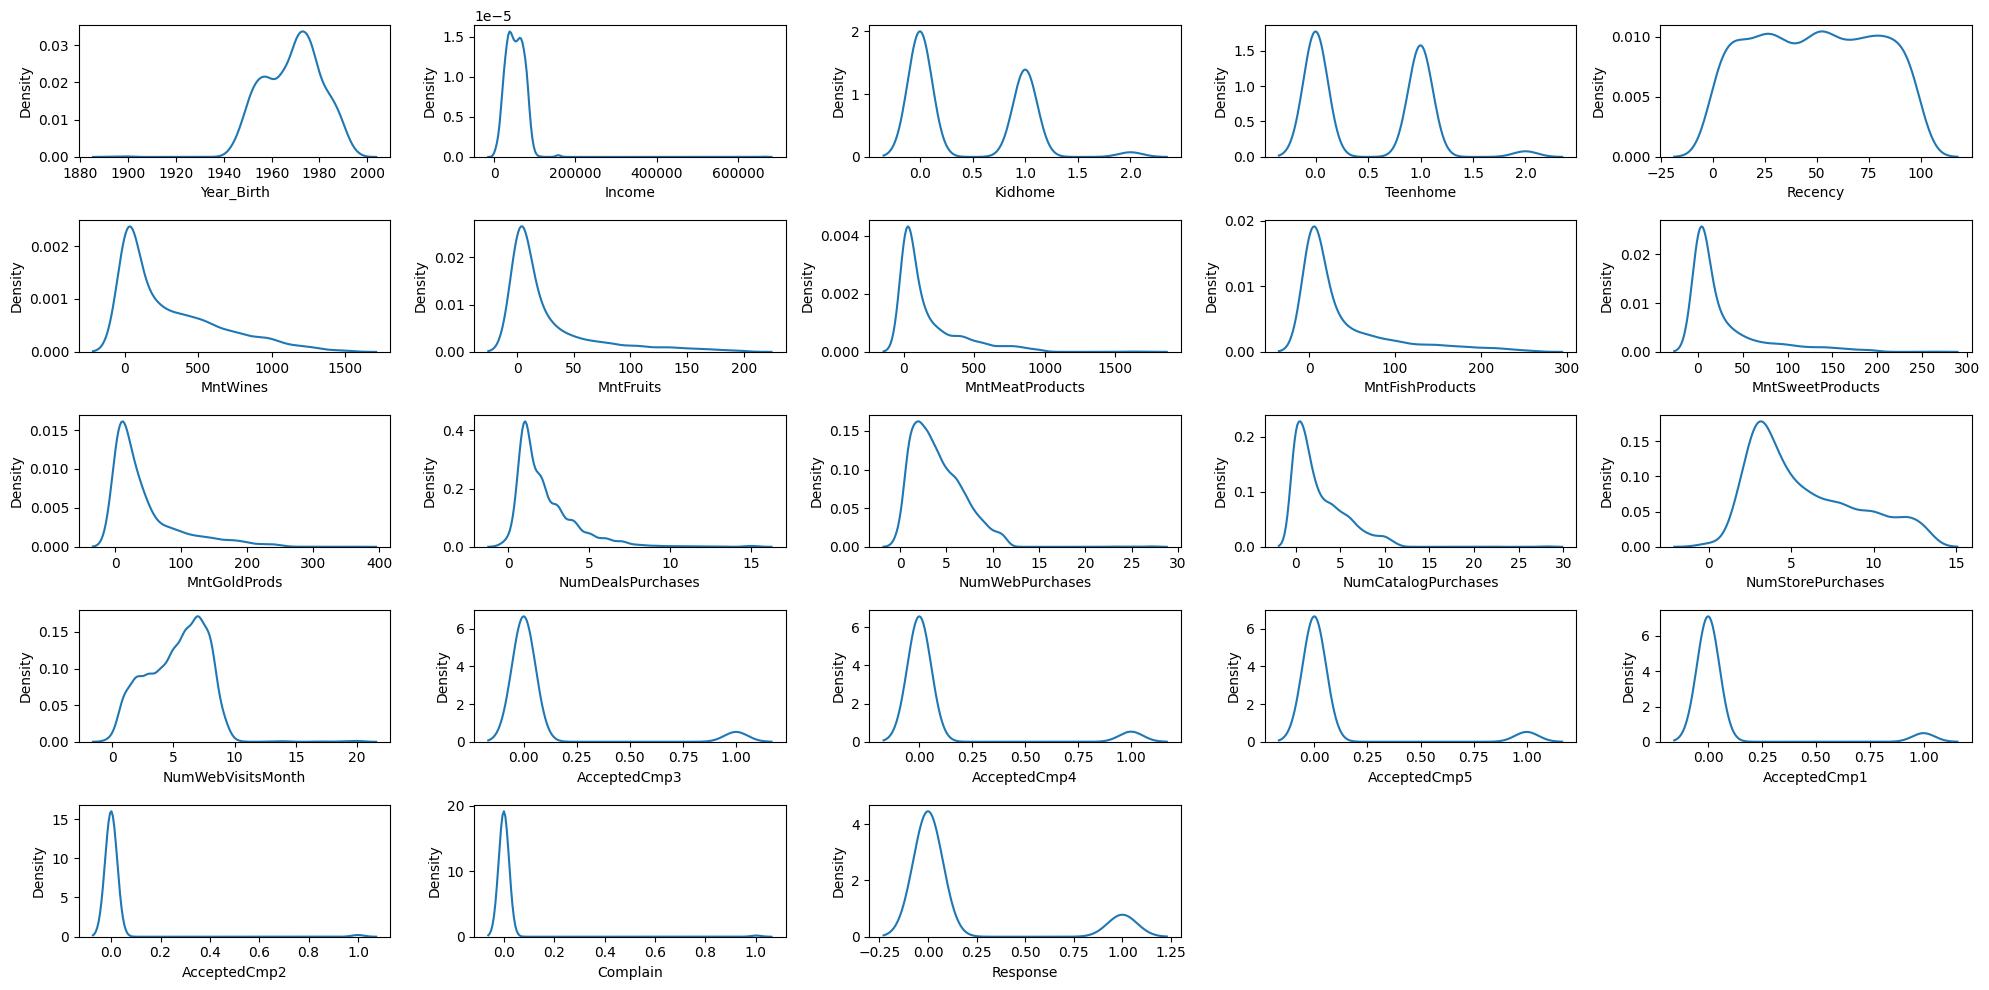

In [ ]:
# menampilkan distribusi feature numerik
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(data[numeric_cols[i]])
    plt.tight_layout()

In [ ]:
# membuat function untuk melihat distribusi pada feature numerik berdasarkan feature kategori (object)
def get_distribution(df, group_column, feature_column, nrow=1, ncol=None):
    unique_values = df[group_column].unique()

    if ncol is None:
        ncol = len(unique_values)

    plt.figure(figsize=(ncol * 6, nrow * 5))

    for i, col in enumerate(unique_values, 1):
        plt.subplot(nrow, ncol, i)
        sns.histplot(df[df[group_column] == col][feature_column], kde=True,
                     color=sns.color_palette('Set1')[i-1])
        plt.title(
            f'{feature_column.capitalize()} Distribution - {str.capitalize(col)}')

    plt.tight_layout()
    plt.show()

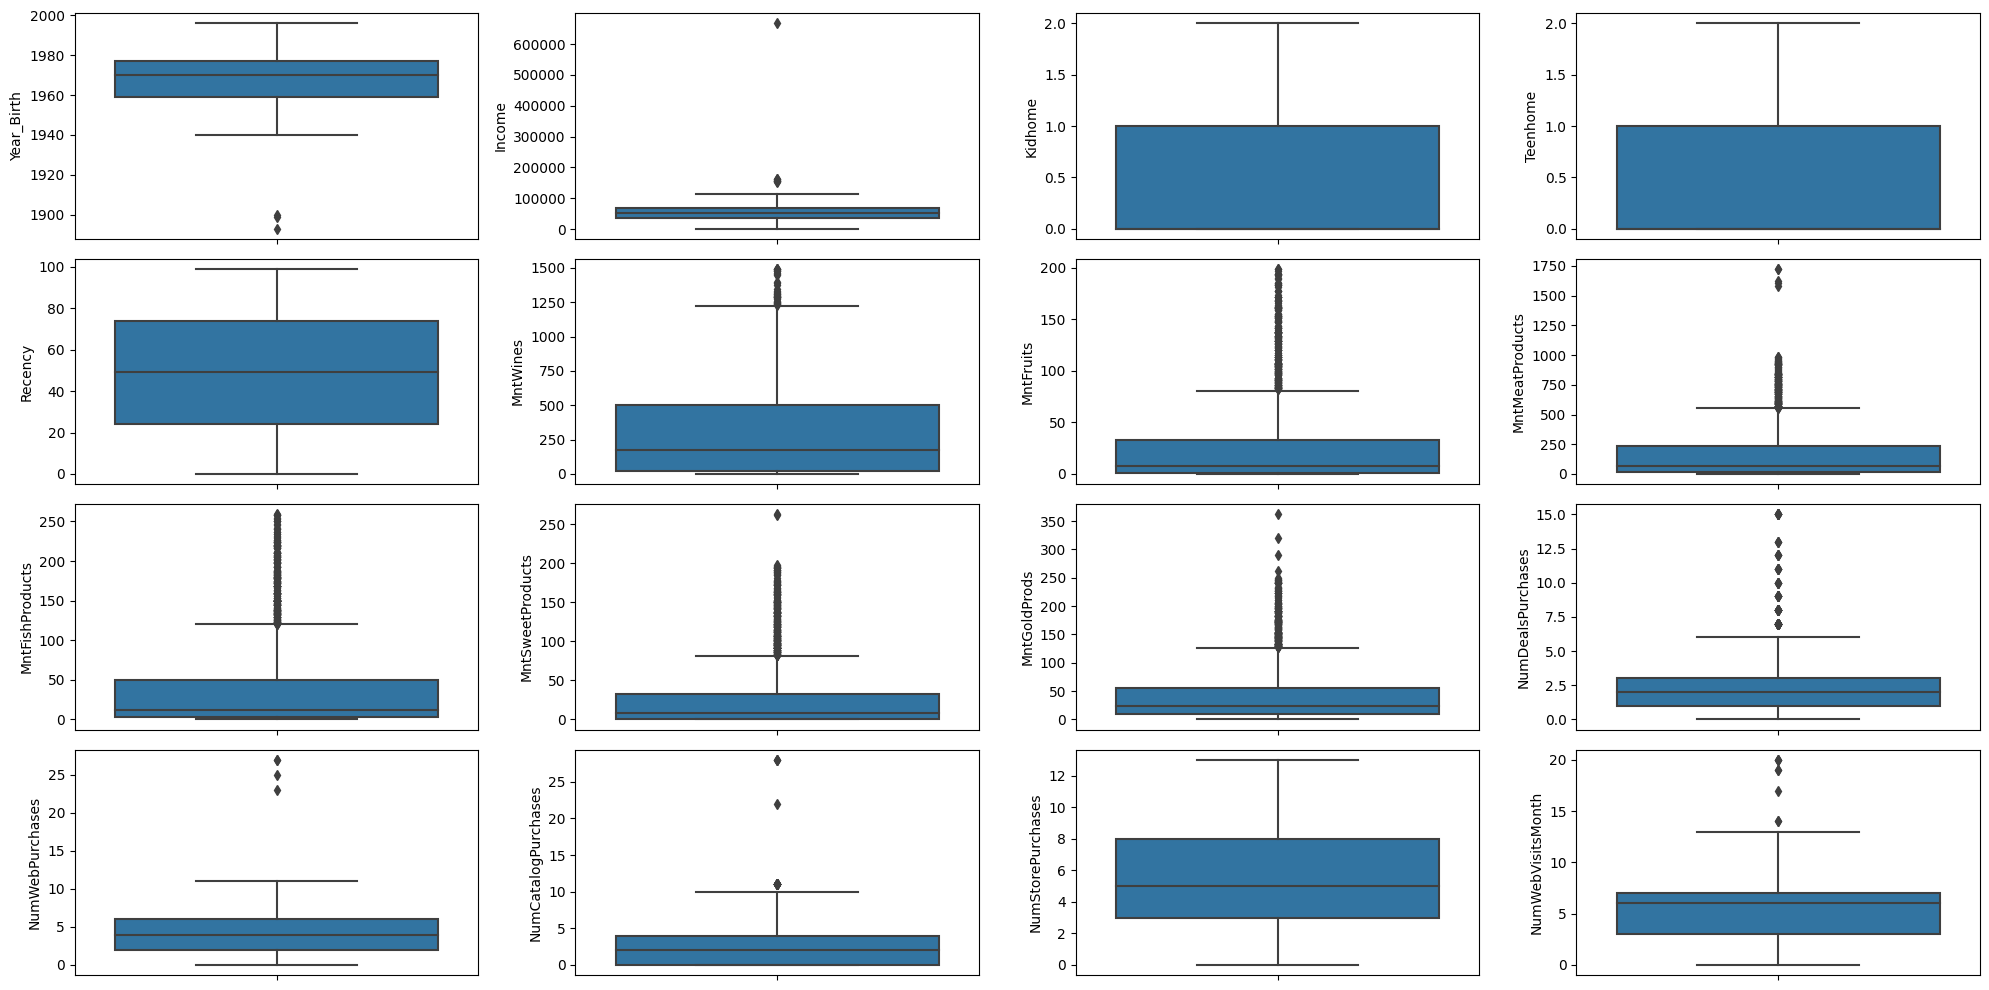

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols[:-7])):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data[numeric_cols[i]])
    plt.tight_layout()

### **3.2.2 Distribution of Categorical Feature** <a id=3.2.2></a>

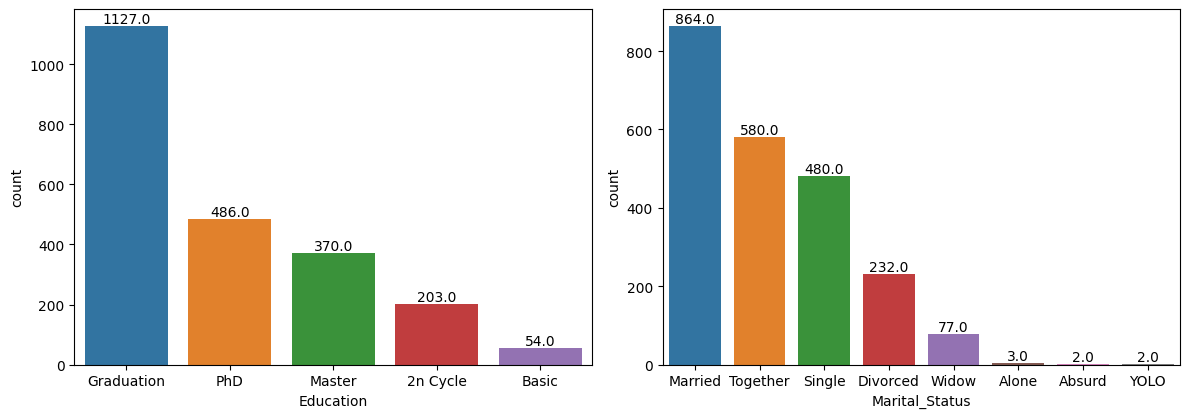

In [ ]:
# setup ukuran figure
plt.figure(figsize=(12, 8))

# iterasi untuk setiap kolom objek
for i in range(0, len(object_cols)):
    # mendapatkan urutan kategori berdasarkan jumlah masing-masing
    order = raw_data[object_cols[i]].value_counts().index

    # membuat subplot
    plt.subplot(2, len(object_cols), i + 1)

    # countplot dengan urutan kategori yang diinginkan
    ax = sns.countplot(x=raw_data[object_cols[i]], order=order)

    # menambahkan label di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # setup pada xticks
    plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

### **3.2.3 Distribution of Datetime Feature** <a id=3.2.3></a>

In [ ]:
# membuat function untuk menampilkan trend distribusi pelanggan yang melakukan registrasi/enrollment setiap bulannya
def monthly_distribution(data, date_col, figsize=(12, 5)):
    """
    fungsi untuk membuat plot distribusi bulanan dari kolom datetime.

    parameters:
    - data: dataframe, data yang akan diplot
    - date_col: str, nama kolom datetime
    - figsize: tuple, ukuran gambar, default=(12, 5)

    returns:
    - none
    """
    # setup subplot untuk line plot
    fig, ax = plt.subplots(figsize=figsize)

    # resample data dan hitung jumlah bulanan
    monthly_counts = data.resample('M', on=date_col).size()

    # plot line distribusi datetime (per bulan)
    ax.plot(monthly_counts.index, monthly_counts.values,
            marker='o', linestyle='-')
    ax.set_title(f'Customer Registration Distribution Trends')
    ax.set_xlabel(date_col)
    ax.set_ylabel('frekuensi')

    # memutar label pada sumbu x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # membuat indeks bulanan dari Juli 2012 hingga Juni 2014
    monthly_index = pd.date_range(
        start='2012-07-01', end='2014-06-30', freq='M')

    # melakukan reindex dengan nilai pada variabel monthly_index
    monthly_counts = monthly_counts.reindex(monthly_index, fill_value=0)

    # mengubah format xticklabels menjadi nama bulan-tahun
    month_year_labels = [date.strftime('%b-%Y')
                         for date in monthly_counts.index]
    ax.set_xticks(monthly_counts.index)
    ax.set_xticklabels(month_year_labels)

    # menampilkan plot
    plt.tight_layout()
    plt.show()

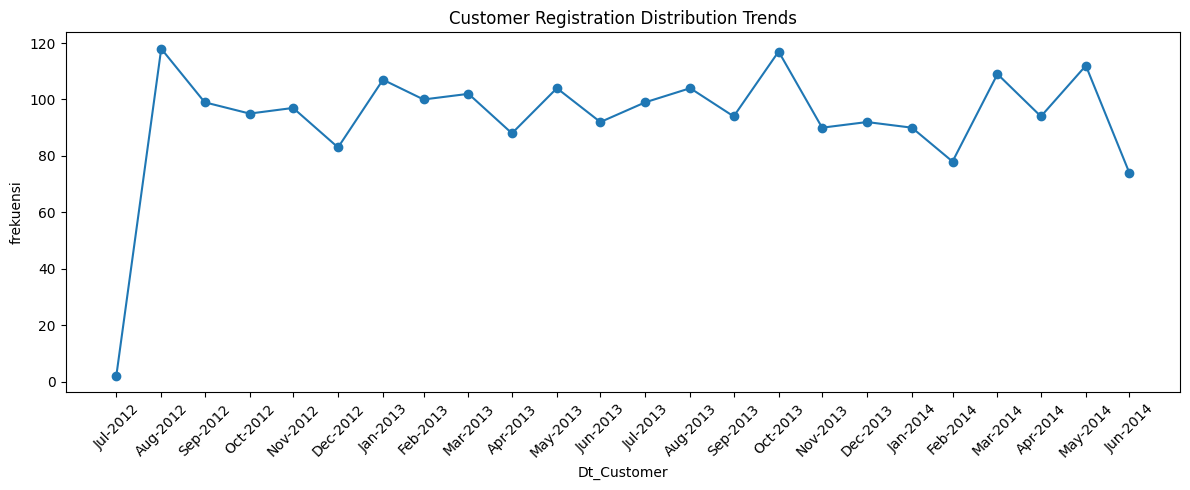

In [ ]:
# memanggil function menampilkan trend pelanggan yang registrasi/enrollment
monthly_distribution(data, 'Dt_Customer')

## **3.3 Multivariate Analysis** <a id=3.3></a>

### **3.3.1 Based on Datetime Analysis** <a id=3.3.1></a>

In [ ]:
# membuat function untuk menampilkan trend distribusi pelanggan yang melakukan registrasi/enrollment setiap bulannya bersadarkan response
def monthly_distribution1(data, date_col, figsize=(12, 5)):
    """
    fungsi untuk membuat plot distribusi bulanan dari kolom datetime.

    parameters:
    - data: dataframe, data yang akan diplot
    - date_col: str, nama kolom datetime
    - figsize: tuple, ukuran gambar, default=(12, 5)

    returns:
    - none
    """
    # setup subplot untuk line plot
    fig, ax = plt.subplots(figsize=figsize)

    # resample data dan hitung jumlah bulanan untuk response = 0
    monthly_counts_0 = data[data['Response'] == 0].resample('M', on='Dt_Customer').size()

    # plot line distribusi datetime (per bulan) untuk response = 0
    ax.plot(monthly_counts_0.index, monthly_counts_0.values,
            marker='o', linestyle='-', label='Response = 0', color = "#FF0000")

    # resample data dan hitung jumlah bulanan untuk response = 1
    monthly_counts_1 = data[data['Response'] == 1].resample('M', on='Dt_Customer').size()

    # plot line distribusi datetime (per bulan) untuk response = 1
    ax.plot(monthly_counts_1.index, monthly_counts_1.values,
            marker='o', linestyle='-', label='Response = 1', color = "#87CEEB")

    # Set title, xlabel, dan ylabel
    ax.set_title('Customer Registration Distribution Trends')
    ax.set_xlabel('Dt_Customer')
    ax.set_ylabel('Frekuensi')

    # memutar label pada sumbu x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # membuat indeks bulanan dari Juli 2012 hingga Juni 2014
    monthly_index = pd.date_range(
        start='2012-07-01', end='2014-06-30', freq='M')

    # melakukan reindex dengan nilai pada variabel monthly_index untuk response = 0
    monthly_counts_0 = monthly_counts_0.reindex(monthly_index, fill_value=0)

    # melakukan reindex dengan nilai pada variabel monthly_index untuk response = 1
    monthly_counts_1 = monthly_counts_1.reindex(monthly_index, fill_value=0)

    # mengubah format xticklabels menjadi nama bulan-tahun
    month_year_labels = [date.strftime('%b-%Y')
                         for date in monthly_index]
    ax.set_xticks(monthly_index)
    ax.set_xticklabels(month_year_labels)

    # Menambah legenda
    ax.legend()

    # menampilkan plot
    plt.tight_layout()
    plt.show()

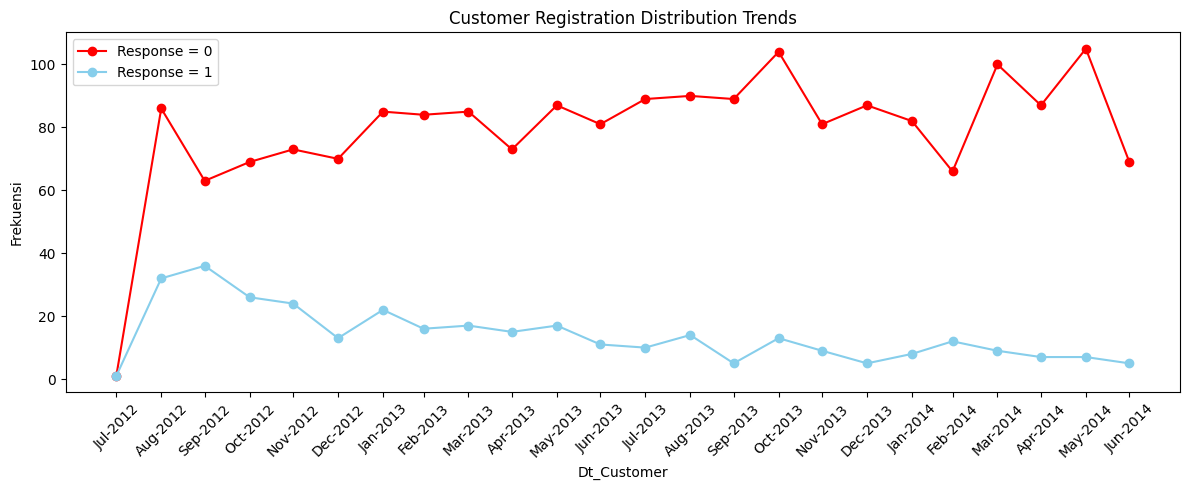

In [ ]:
# memanggil function menampilkan trend pelanggan yang registrasi/enrollment berdasarkan response
monthly_distribution1(data, 'Dt_Customer')

### **3.3.2 Based on Regression Line** <a id=3.3.2></a>

In [ ]:
# membuat function untuk menampilkan regression plot untuk beberapa feature terhadap target
def plot_regression_subplots(data, columns, nrows, ncols, y='Response'):

    # setup subplots seperti jumlah row, columns, dan ukukran figure
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 5))

    # melakukan perulangan pada setiap feature yang akan ditampilkan
    for i, col in enumerate(columns):
        if nrows == 1:
            ax = axes[i]
        else:
            row_index = i // ncols
            col_index = i % ncols
            ax = axes[row_index][col_index]
        sns.regplot(data=data, x=col, y=y, logistic=True, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel(y)

    # memberikan judul pada setiap plot yang ditampilkan
    plt.suptitle(f'{columns} vs {y}')

    plt.tight_layout()
    plt.show()

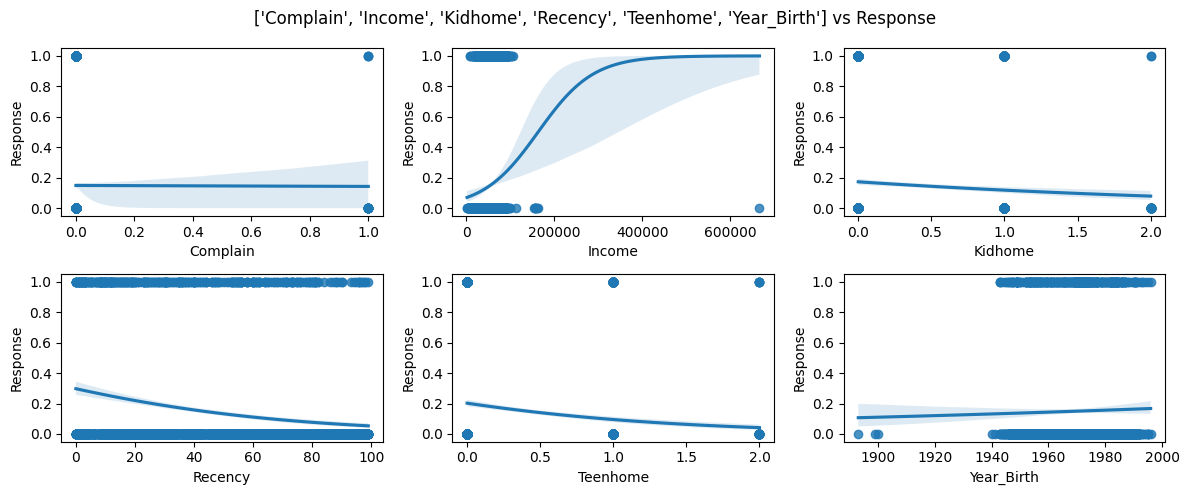

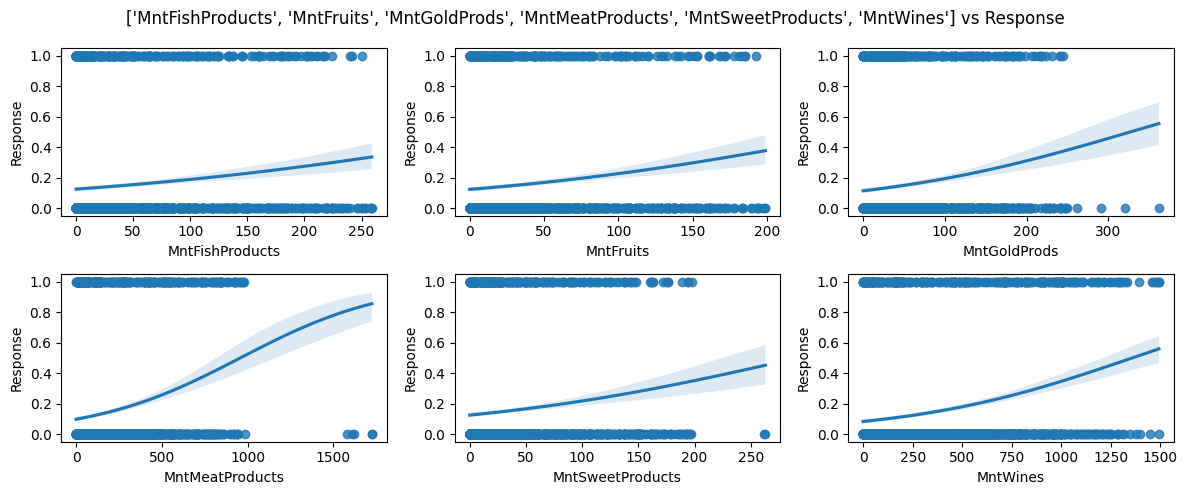

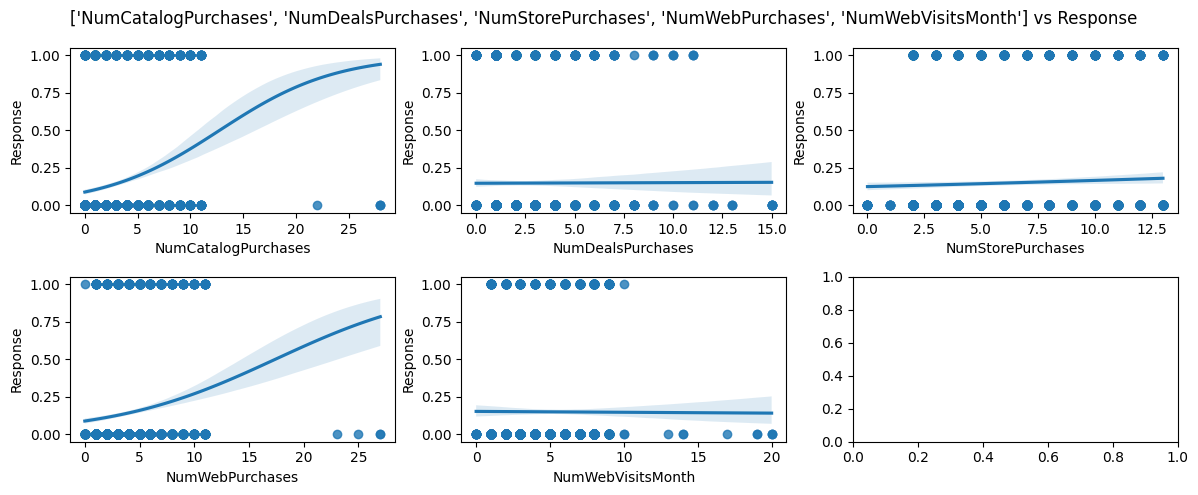

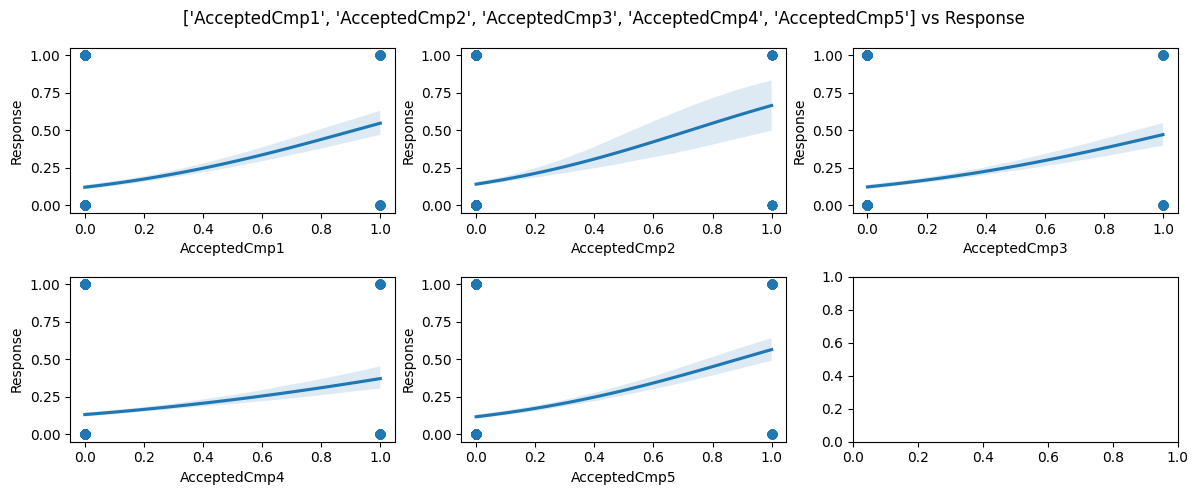

In [ ]:
# memanggil function untuk menampilkan regression plot
plot_regression_subplots(data, ['Complain', 'Income', 'Kidhome', 'Recency', 'Teenhome', 'Year_Birth'], 2, 3)
plot_regression_subplots(data, spending_cols, 2, 3)
plot_regression_subplots(data, purchase_cols, 2, 3)
plot_regression_subplots(data, campaign_cols[:-1], 2, 3)

### **3.3.3 Percentage of Response Based on Categorical Feature** <a id=3.3.3></a>

In [ ]:
def plot_stacked_bar(df, group_column, response_column, palette='Set1', ax=None):

    # menghitung proporsi Response berdasarkan grup
    prop_response = df.groupby(group_column)[
        response_column].value_counts(normalize=True).unstack()

    # membuat bar plot dengan palet warna
    colors = sns.color_palette(palette)[:2]

    # menggunakan sumbu yang diberikan atau membuat figure baru
    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()

    prop_response.plot(kind='bar', stacked=True, color=colors, ax=ax)

    # menambahkan label dan judul
    ax.set_xlabel(group_column)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage of {response_column} by {group_column}')
    ax.legend(title=response_column,
              labels=df[response_column].unique(), loc='upper right')

    # memutar label pada sumbu x dengan rotasi 0 derajat
    ax.tick_params(axis='x', rotation=0)

    # menampilkan plot jika tidak ada sumbu yang diberikan
    if ax is None:
        plt.show()

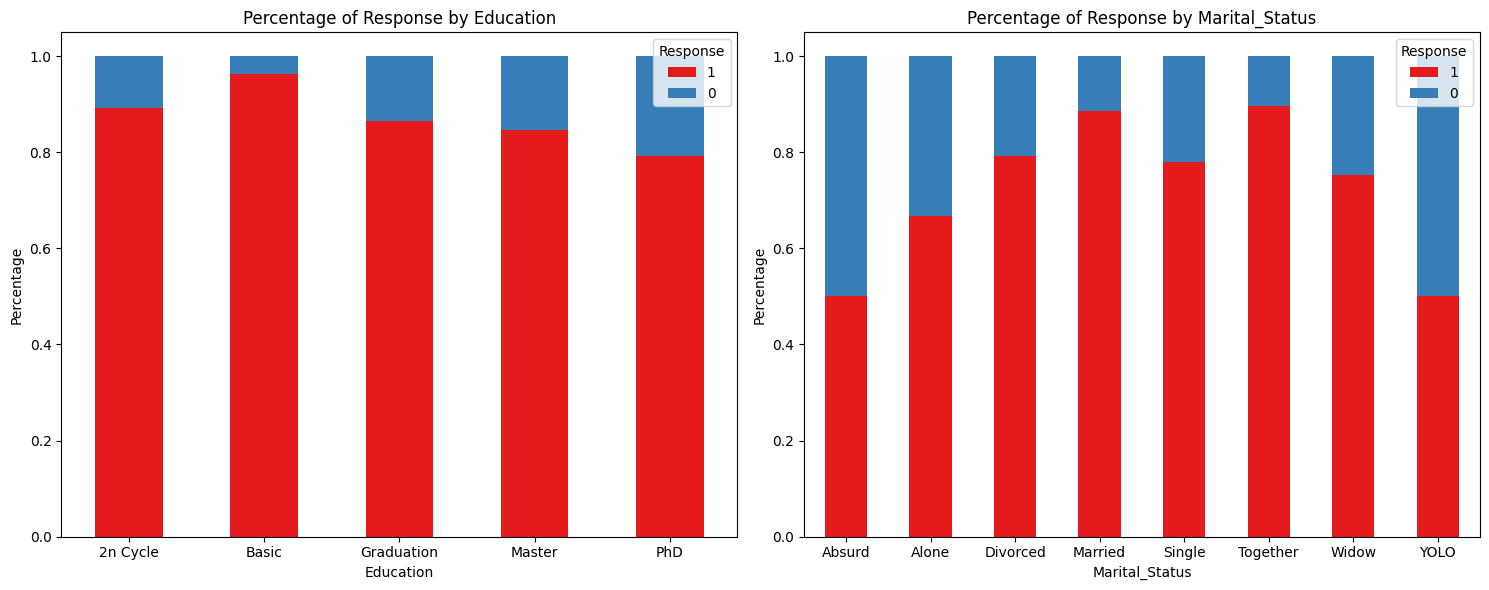

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# memanggil fungsi untuk setiap kolom grup
for ax, col in zip(axes, ['Education', 'Marital_Status']):
    plot_stacked_bar(data, col, 'Response', ax=ax)

plt.tight_layout()
plt.show()

### **3.3.4 Based on Correlation Coefficient (Heatmap)** <a id=3.3.4></a>

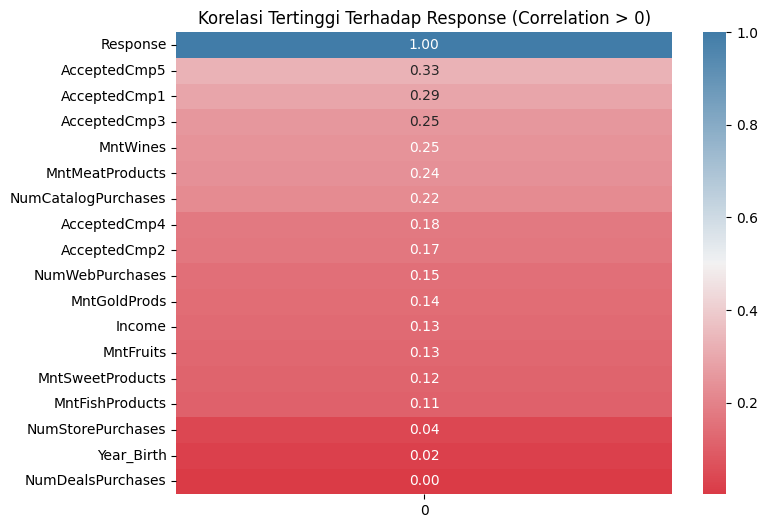

In [ ]:
CORR = data.corrwith(data['Response'], axis=0,
                     method='pearson', drop=False).sort_values(ascending=False)

# filter nilai korelasi di atas 0 (positif)
positive_corr = CORR[CORR > 0]

# memilih 10 korelasi tertinggi
top_positive_corr = positive_corr

# mengatur color palette
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# menampikan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_positive_corr.to_frame(), annot=True, fmt=".2f", cmap=cmap)
plt.title('Korelasi Tertinggi Terhadap Response (Correlation > 0)')
plt.show()

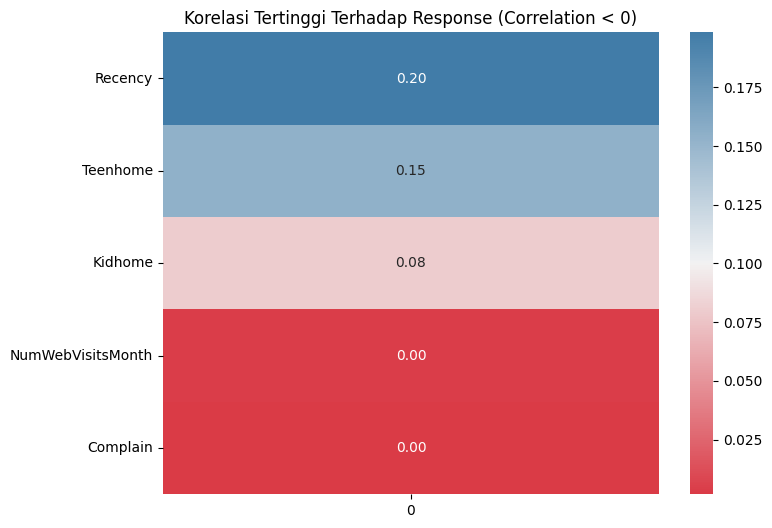

In [ ]:
CORR = data.corrwith(data['Response'], axis=0,
                     method='pearson', drop=False).sort_values(ascending=True)

# filter nilai korelasi di bawah 0 (negatif)
negative_corr = CORR[CORR < 0]

# memilih 10 korelasi tertinggi
top_negative_corr = negative_corr.abs()

# setup color palette
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# menampilkan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_negative_corr.to_frame(), annot=True, fmt=".2f", cmap=cmap)
plt.title('Korelasi Tertinggi Terhadap Response (Correlation < 0)')
plt.show()

<Axes: >

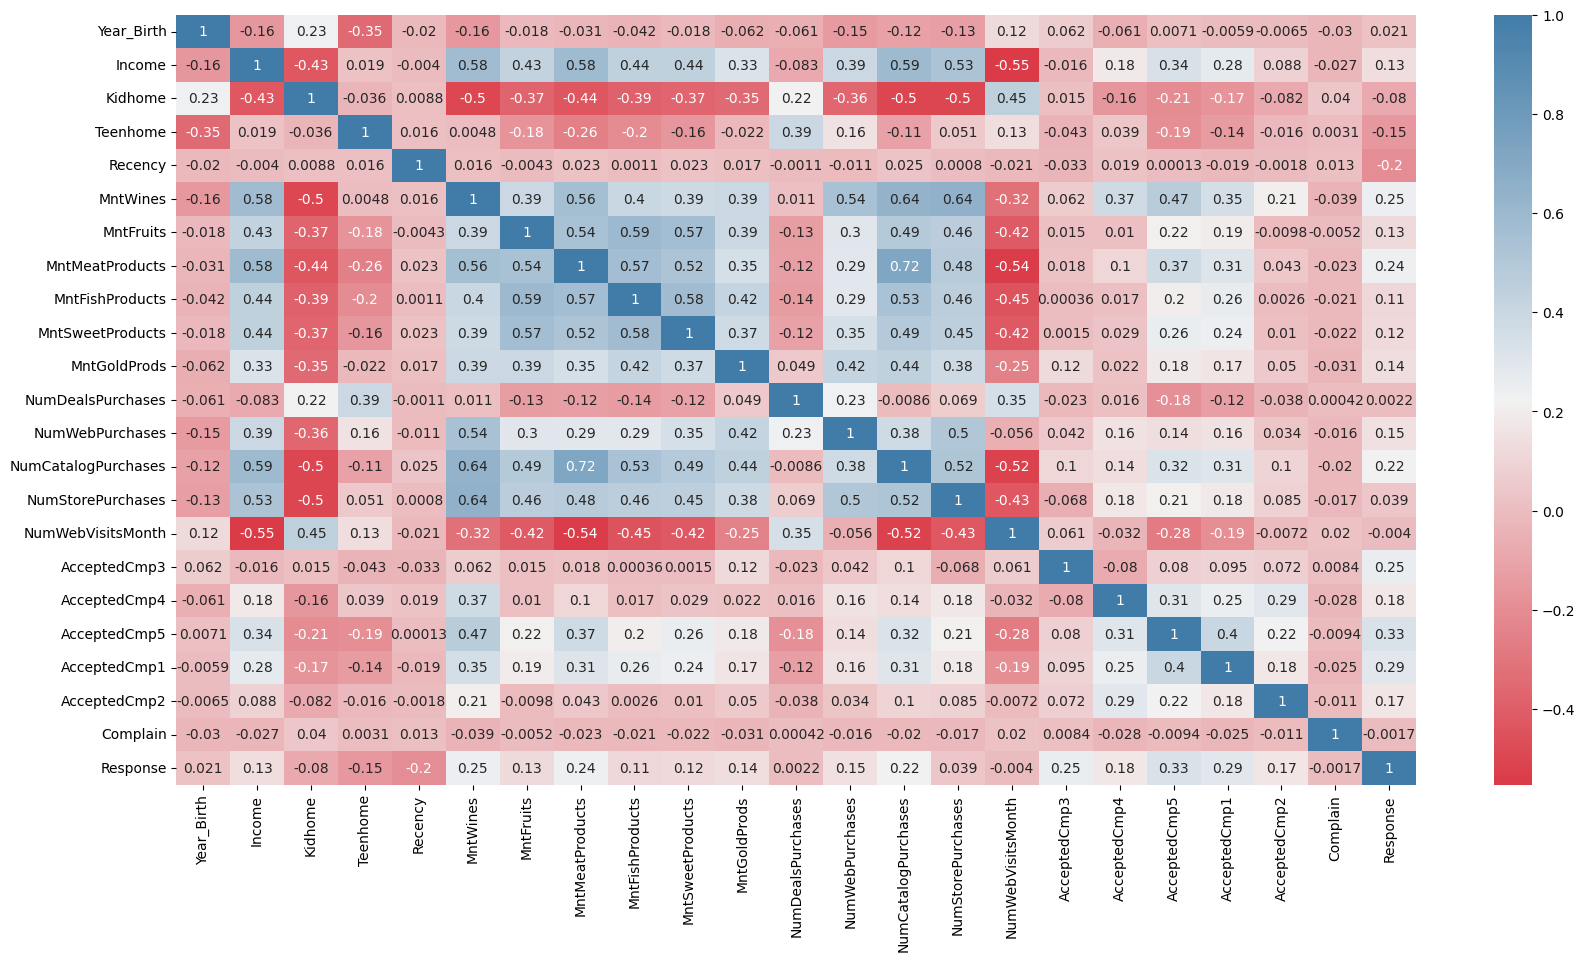

In [ ]:
# menampilkan heatmap multikorelasi antar variabel numerical
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap=sns.diverging_palette(10, 240,as_cmap=True), ax=ax)

## **3.4 Business Insights** <a id=3.4></a>

In [ ]:
# menghitung jumlah responden dengan Yes Response tanpa menerima kampanye manapun
no_campaign_response = len(data[(data['AcceptedCmp1'] == 0) & (data['AcceptedCmp2'] == 0) & (data['AcceptedCmp3'] == 0) & (data['AcceptedCmp4'] == 0) & (data['AcceptedCmp5'] == 0) & (data['Response'] == 1)])

# menghitung jumlah responden dengan Yes Response
total_yes_response = len(data[data['Response'] == 1])

# menghitung jumlah responden dengan Yes Response yang setidaknya menerima satu kampanye
at_least_one_campaign_response = total_yes_response - no_campaign_response

# menampilkan hasil
print('Total Yes Response:', total_yes_response)
print('Yes Response without accepting any campaigns:', no_campaign_response)
print('Yes Response accepting at least one campaign:', at_least_one_campaign_response)

# menampilkan proporsi dalam persentase
percentage_no_campaign_response = (no_campaign_response / total_yes_response) * 100
percentage_at_least_one_campaign_response = (at_least_one_campaign_response / total_yes_response) * 100

print('Percentage of Yes Response without accepting any campaigns: {:.2f}%'.format(percentage_no_campaign_response))
print('Percentage of Yes Response accepting at least one campaign: {:.2f}%'.format(percentage_at_least_one_campaign_response))


Total Yes Response: 334
Yes Response without accepting any campaigns: 146
Yes Response accepting at least one campaign: 188
Percentage of Yes Response without accepting any campaigns: 43.71%
Percentage of Yes Response accepting at least one campaign: 56.29%


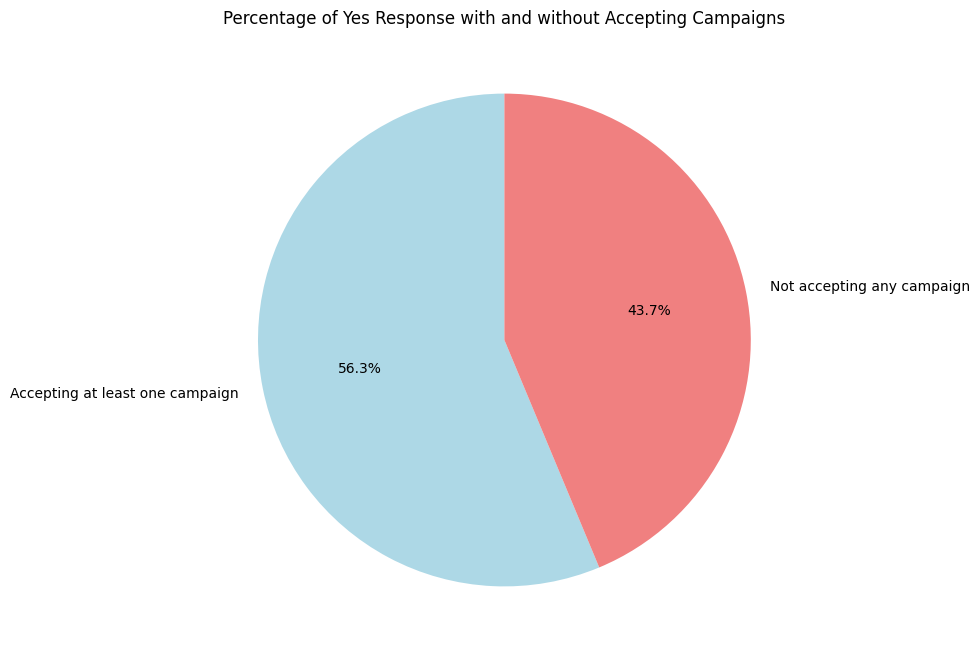

In [ ]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels = ['Accepting at least one campaign', 'Not accepting any campaign']
sizes = [percentage_at_least_one_campaign_response, percentage_no_campaign_response]

# Warna untuk setiap bagian pie chart
colors = ['lightblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Yes Response with and without Accepting Campaigns')

# Menampilkan pie chart
plt.show()

In [ ]:
# success rate untuk setiap campaign yang diberikan
# inisialisasi dataFrame
campaigns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']
df_marketing = pd.DataFrame(0, index=campaigns + ['Any campaigns', 'Total Response'], columns=['Count', 'Yes Response', 'Success Rate'])

# menghitung metrik untuk setiap campaign
for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    count = data[col].sum()
    yes_response = data[(data[col] == 1) & (data['Response'] == 1)].shape[0]
    success_rate = np.round(yes_response / count * 100, 2)

    # mengisi nilai DataFrame
    df_marketing.loc[col[8:], ['Count', 'Yes Response', 'Success Rate']] = [count, yes_response, success_rate]

# menghitung metrik untuk 'Any campaigns' dan 'Total Response'
df_marketing.loc['Any campaigns', 'Count'] = len(data) - 1777
df_marketing.loc['Any campaigns', 'Yes Response'] = len(data[data['Response'] == 1])
df_marketing.loc['Any campaigns', 'Success Rate'] = np.round(df_marketing.loc['Any campaigns', 'Yes Response'] / df_marketing.loc['Any campaigns', 'Count'] * 100, 2)

df_marketing.loc['Total Response', 'Count'] = len(data)
df_marketing.loc['Total Response', 'Yes Response'] = len(data[data['Response'] == 1])
df_marketing.loc['Total Response', 'Success Rate'] = np.round(df_marketing.loc['Total Response', 'Yes Response'] / len(data) * 100, 2)

# menampilkan dataFrame
df_marketing

Count  Yes Response  Success Rate
Cmp1              144            79         54.86
Cmp2               30            20         66.67
Cmp3              163            77         47.24
Cmp4              167            62         37.13
Cmp5              163            92         56.44
Any campaigns     463           334         72.14
Total Response   2240           334         14.91

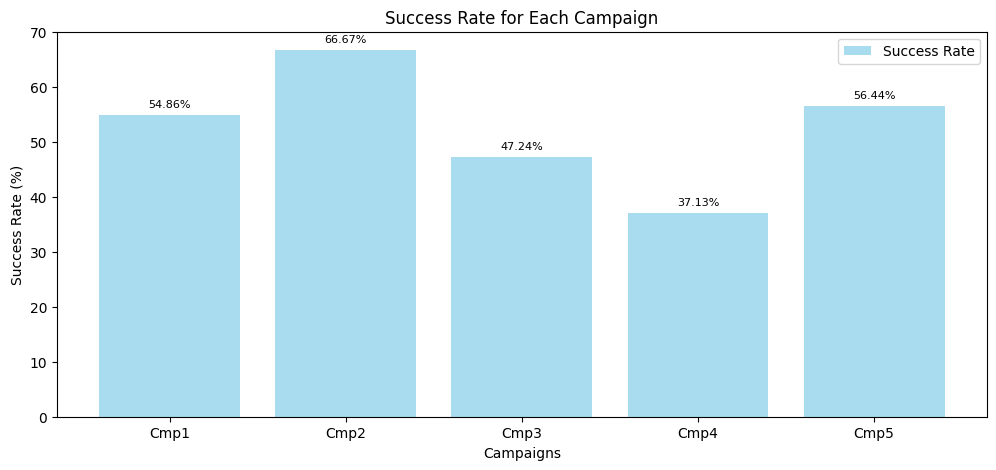

In [ ]:
# plotting
fig, ax = plt.subplots(figsize=(12, 5))

# plotting Success Rate untuk setiap campaign
ax.bar(df_marketing.index[:-2], df_marketing['Success Rate'][:-2], color='skyblue', alpha=0.7, label='Success Rate')

# menambahkan label dan judul
ax.set_xlabel('Campaigns')
ax.set_ylabel('Success Rate (%)')
ax.set_title('Success Rate for Each Campaign')

# menambahkan nilai
for i, v in enumerate(df_marketing['Success Rate'][:-2]):
    ax.text(i, v + 1, str(v) + '%', ha='center', va='bottom', fontsize=8)

# menampilkan legenda
ax.legend()

# menampilkan plot
plt.show()

In [ ]:
# membuat function untuk menampilkan plot pada agregasi data
def plot_grouped(data, group_column, variables, nrows=1, ncols=1, method='mean', hue=None):
    """
    Plot the average of specified variables grouped by the specified column.

    Parameters:
    - data: Pandas DataFrame containing the data.
    - group_column: Column to be used for grouping.
    - variables: List of variables to plot.
    - nrows: Number of rows in the subplot grid.
    - ncols: Number of columns in the subplot grid.
    - method: Method to aggregate the data ('mean', 'sum', 'count').
    - hue: Variable to differentiate the data further (categorical variable).

    Returns:
    - None (displays the plot).
    """

    # melakukan filter pada feature yang bertipe data numerik
    numeric_variables = [
        var for var in variables if pd.api.types.is_numeric_dtype(data[var])]

    # agregasi data berdasarkan hasil feature yang telah terfilter sebelumnya
    grouped_data = data.groupby([group_column, hue]).agg(
        {variable: method for variable in numeric_variables}).reset_index()

    # setup color palette
    palette = sns.color_palette('Set1', len(numeric_variables))

    # setup subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(10 * ncols, 5 * nrows))

    # untuk memastikan bahwa axes tetap iterable untuk kasus 1 subplot
    if nrows == 1 and ncols == 1:
        axes = [axes]

    # agregasi sesuai dengan methode yang terdefinisi pada parameter
    if method == 'mean':
        title = 'Average'
    elif method == 'sum':
        title = 'Total'
    elif method == 'count':
        title = 'Count'

    # melakukan perulangan pada setiap feature yang ditampilkan
    for i, variable in enumerate(numeric_variables):

        # menentukan posisi axes setiap feature
        row_index = i // ncols
        col_index = i % ncols
        ax = sns.barplot(x=group_column, y=variable, hue=hue,
                         data=grouped_data, ax=axes[row_index][col_index], palette=palette)

        # menentukan title, xlabel, ylabel, dan xticks
        axes[row_index][col_index].set_title(
            f'{title} {variable} by {group_column}')
        axes[row_index][col_index].set_ylabel(variable)
        axes[row_index][col_index].set_xlabel(group_column)
        axes[row_index][col_index].tick_params(axis='x', rotation=0)

        # menambahkan label angka di atas setiap bar
        for p in ax.patches:
            height = p.get_height()
            axes[row_index][col_index].text(p.get_x() + p.get_width()/2., height,
                                            f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()

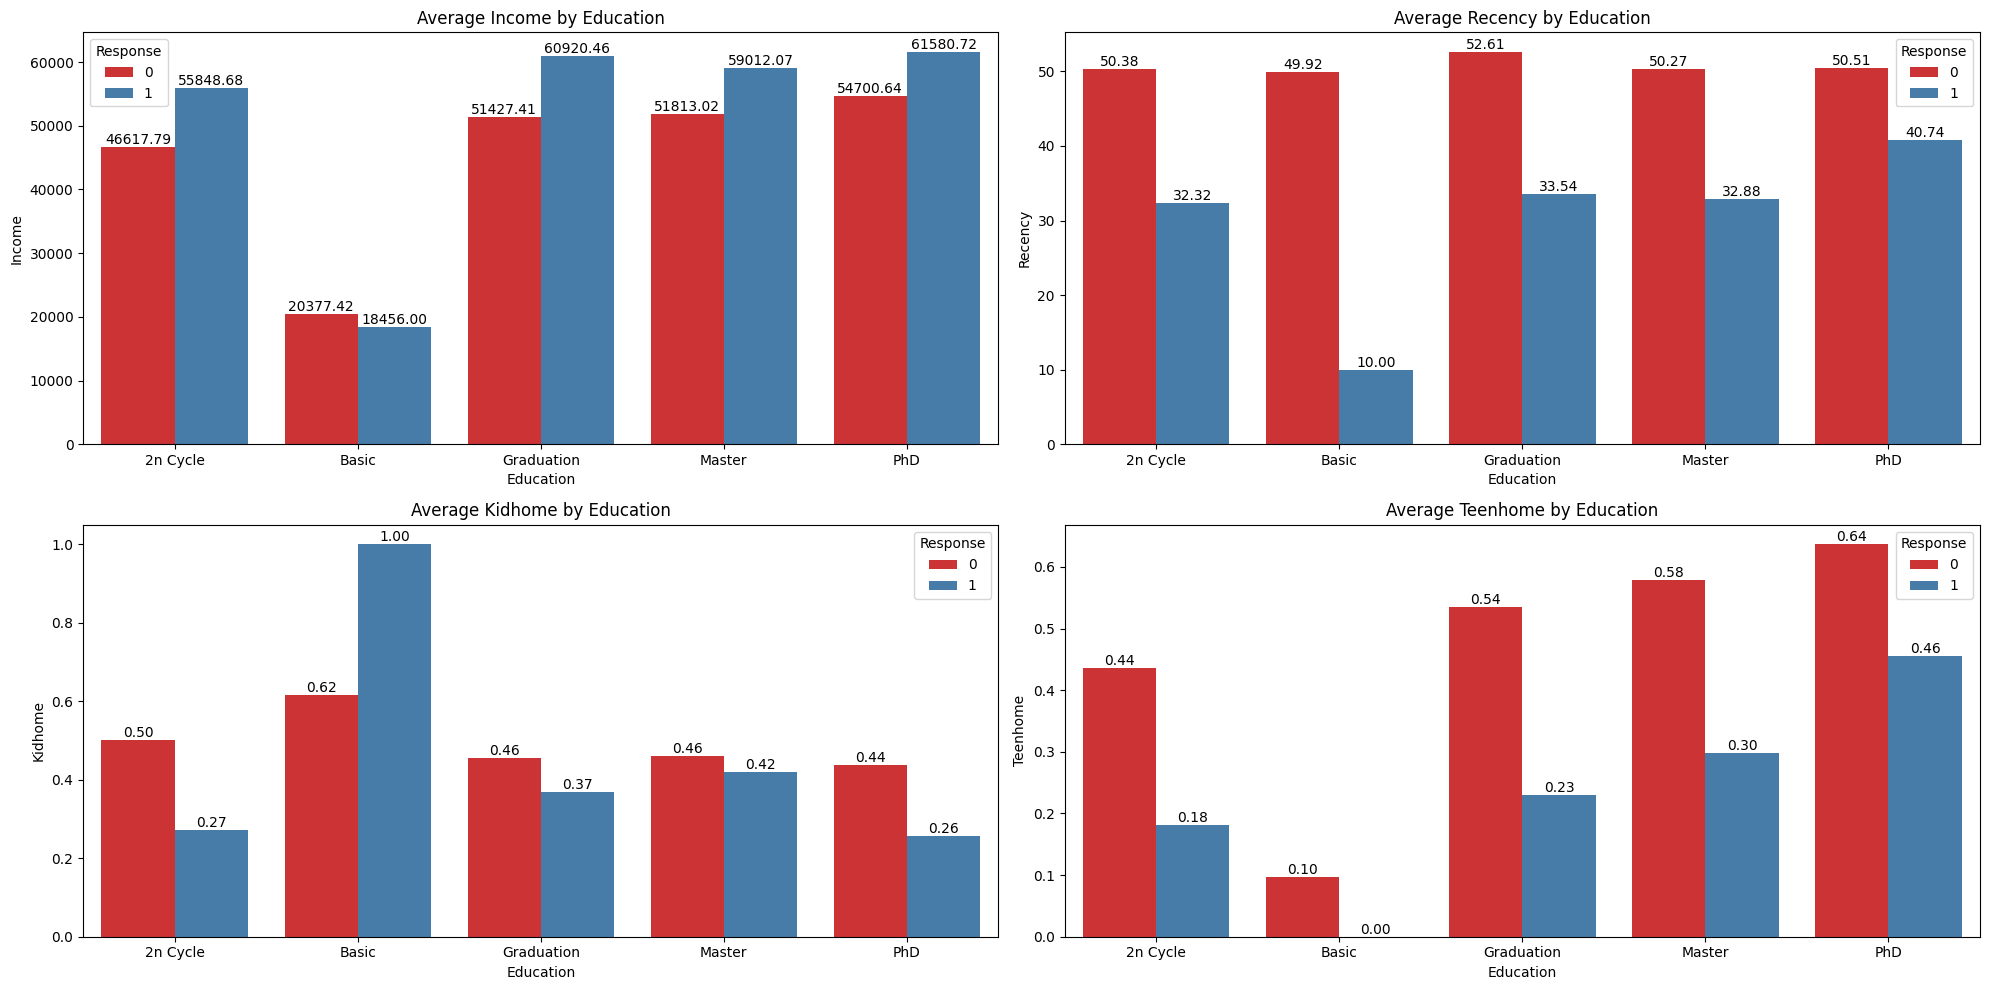

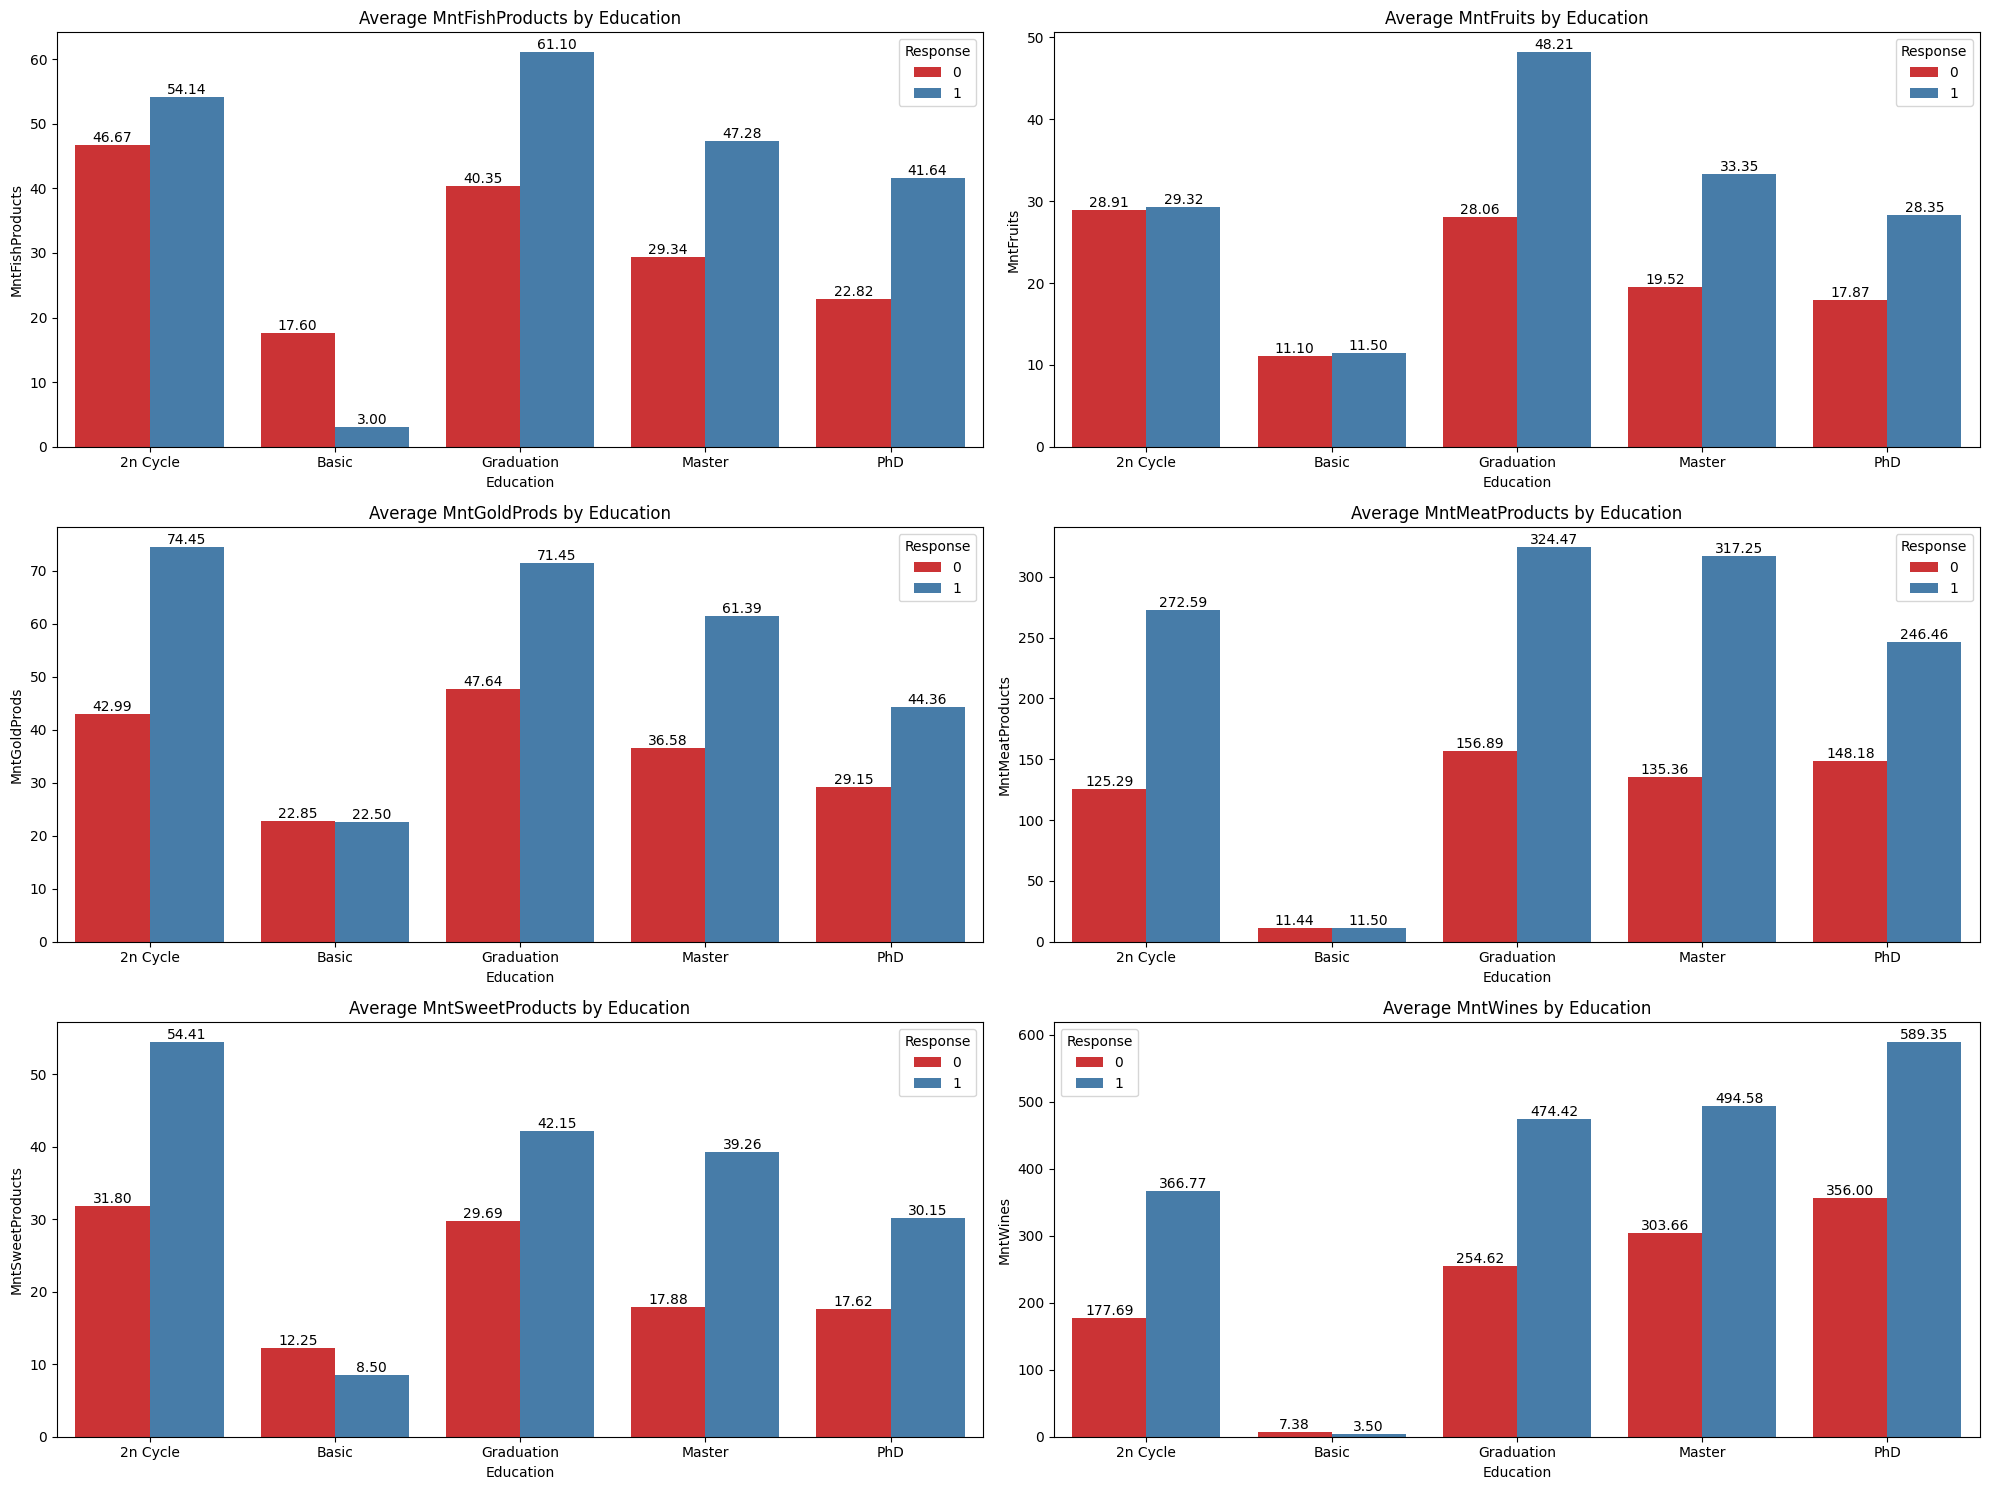

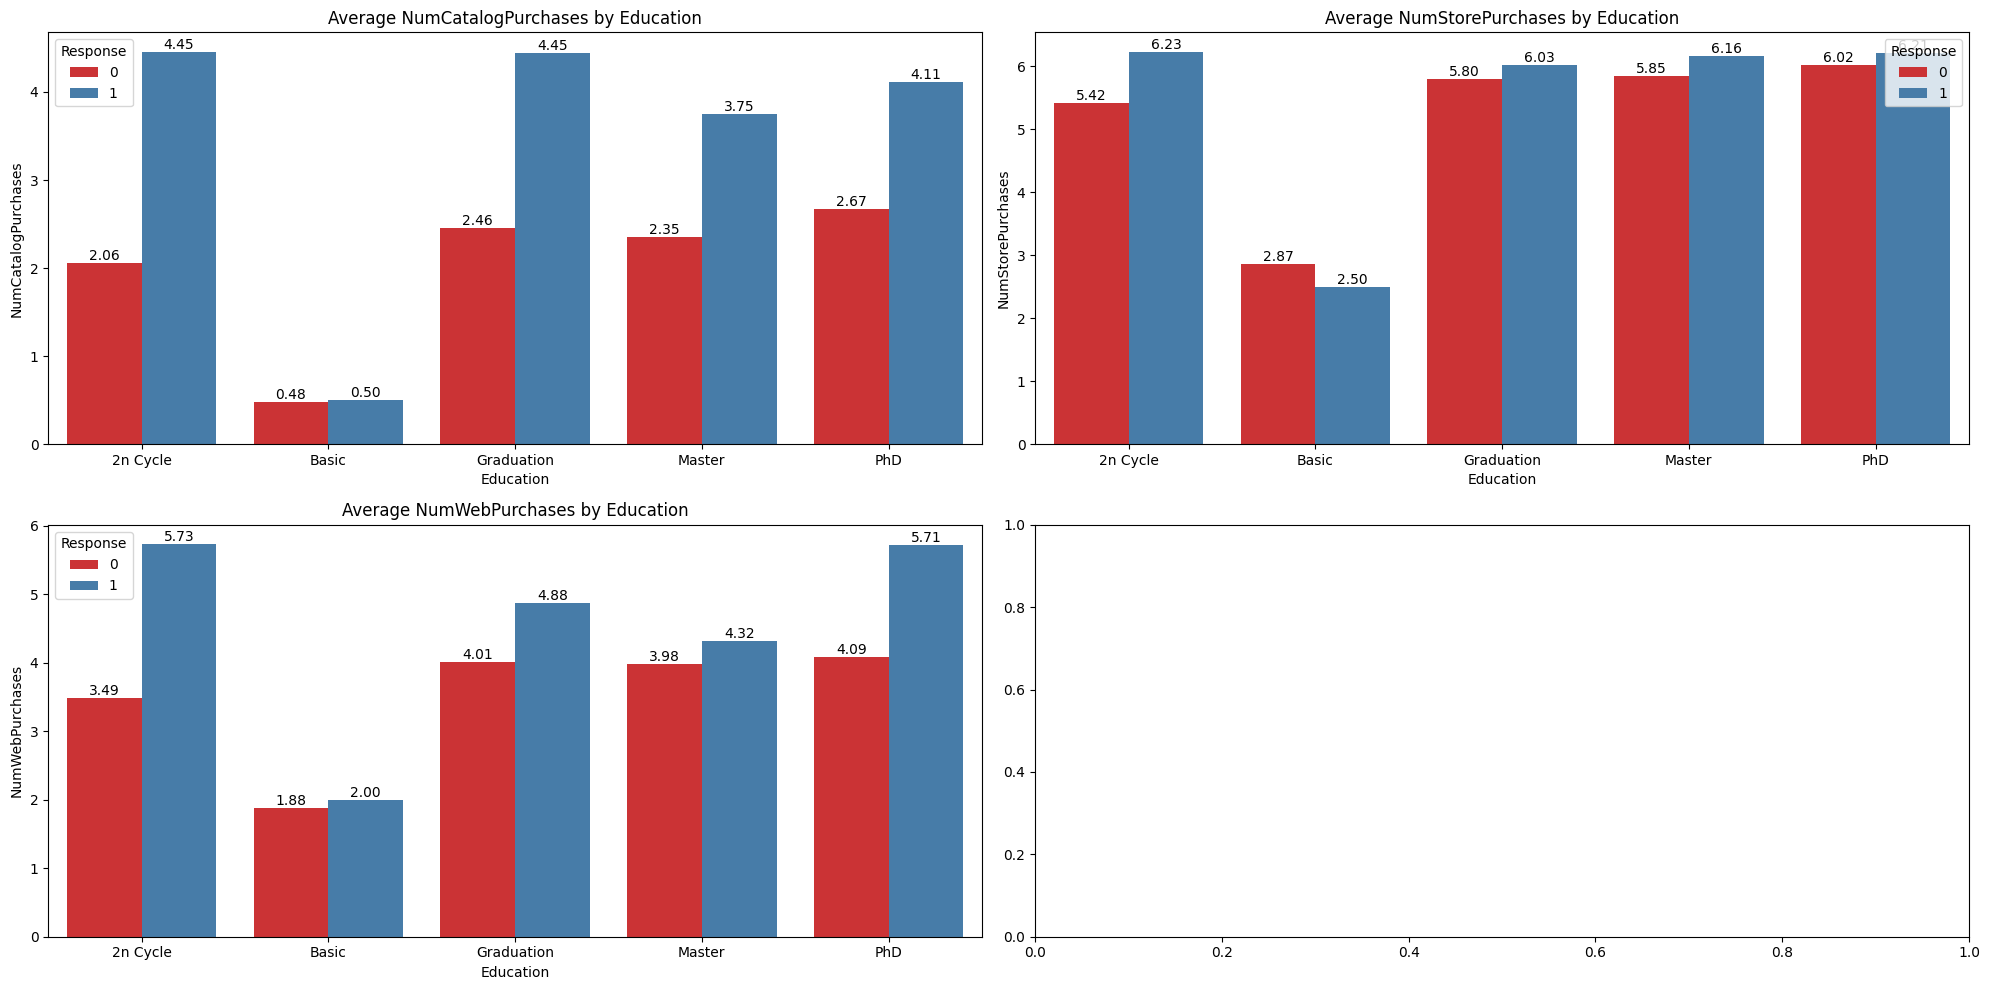

In [ ]:
# memanggil function untuk menampilkan barplot pada agregasi feature education
plot_grouped(data, 'Education', ['Income','Recency','Kidhome','Teenhome'],
             nrows=2, ncols=2, hue='Response')

plot_grouped(data, 'Education', spending_cols,
             nrows=3, ncols=2, method='mean', hue='Response')

plot_grouped(data, 'Education', ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases'],
             nrows=2, ncols=2, method='mean', hue='Response')

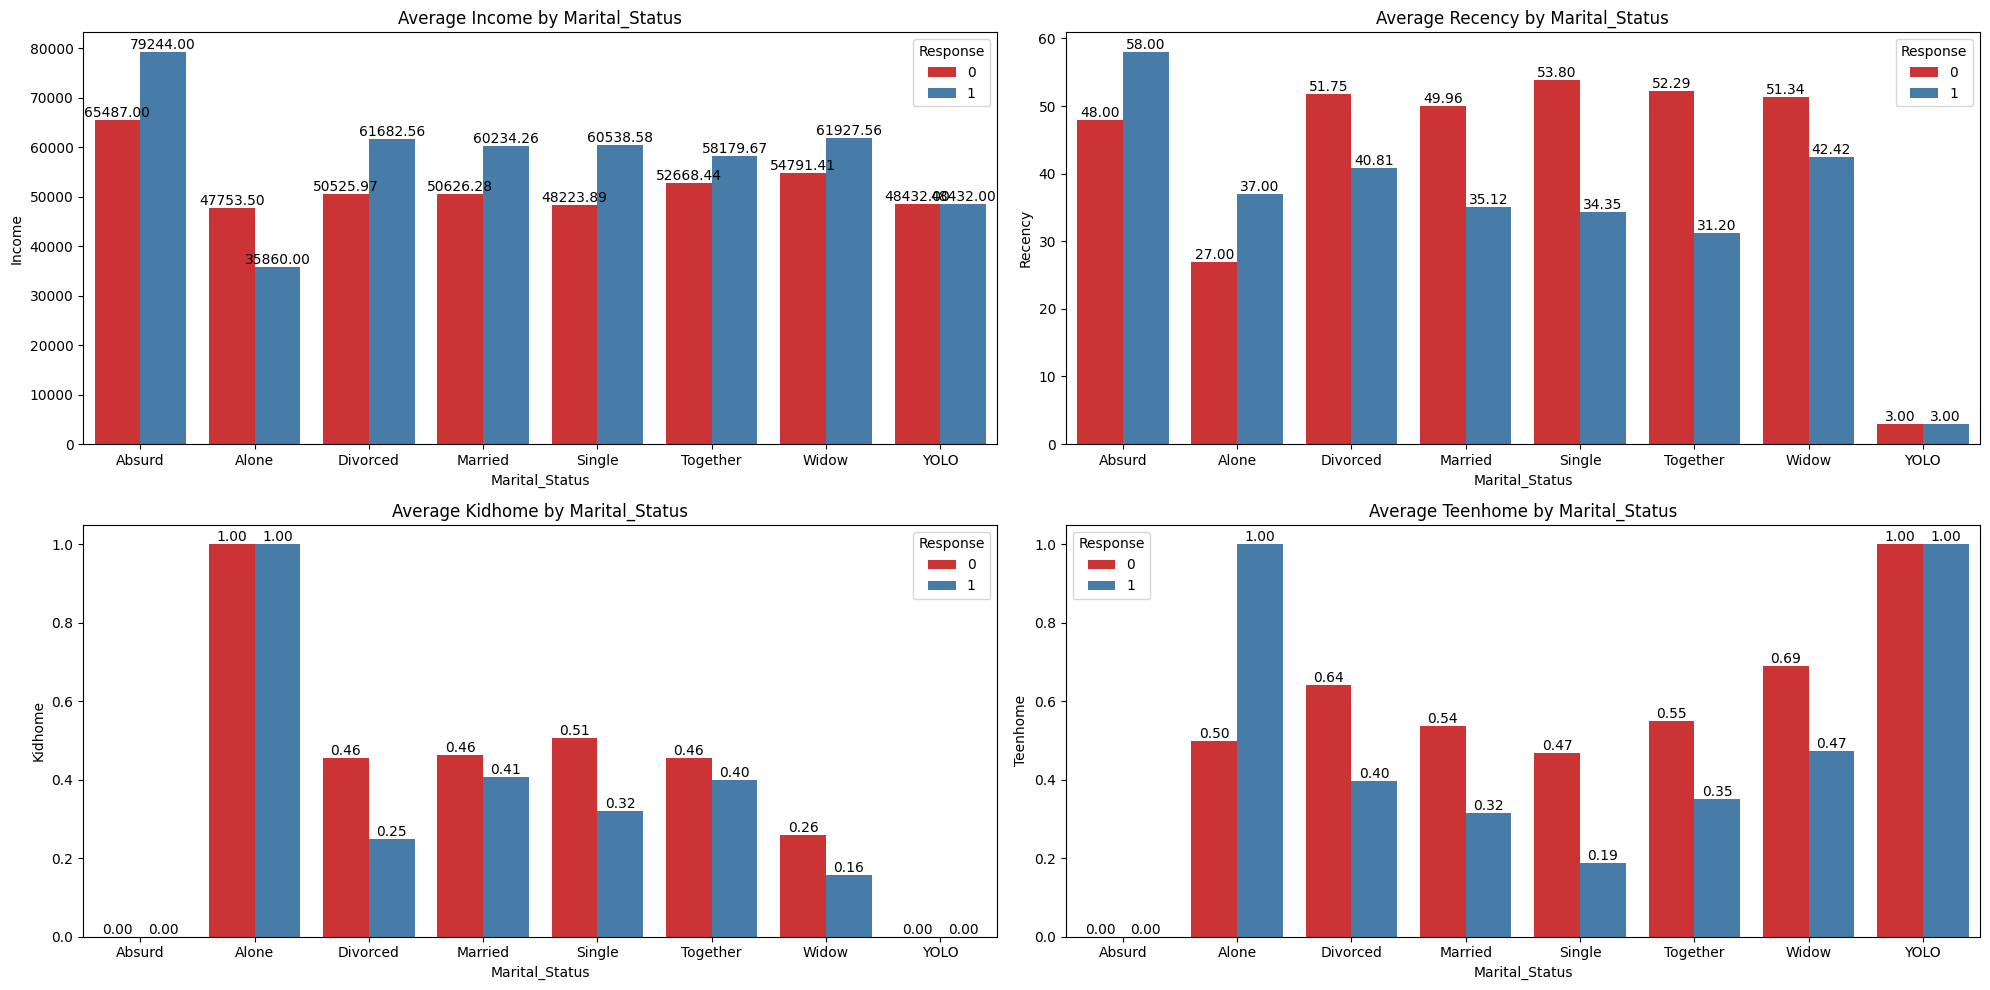

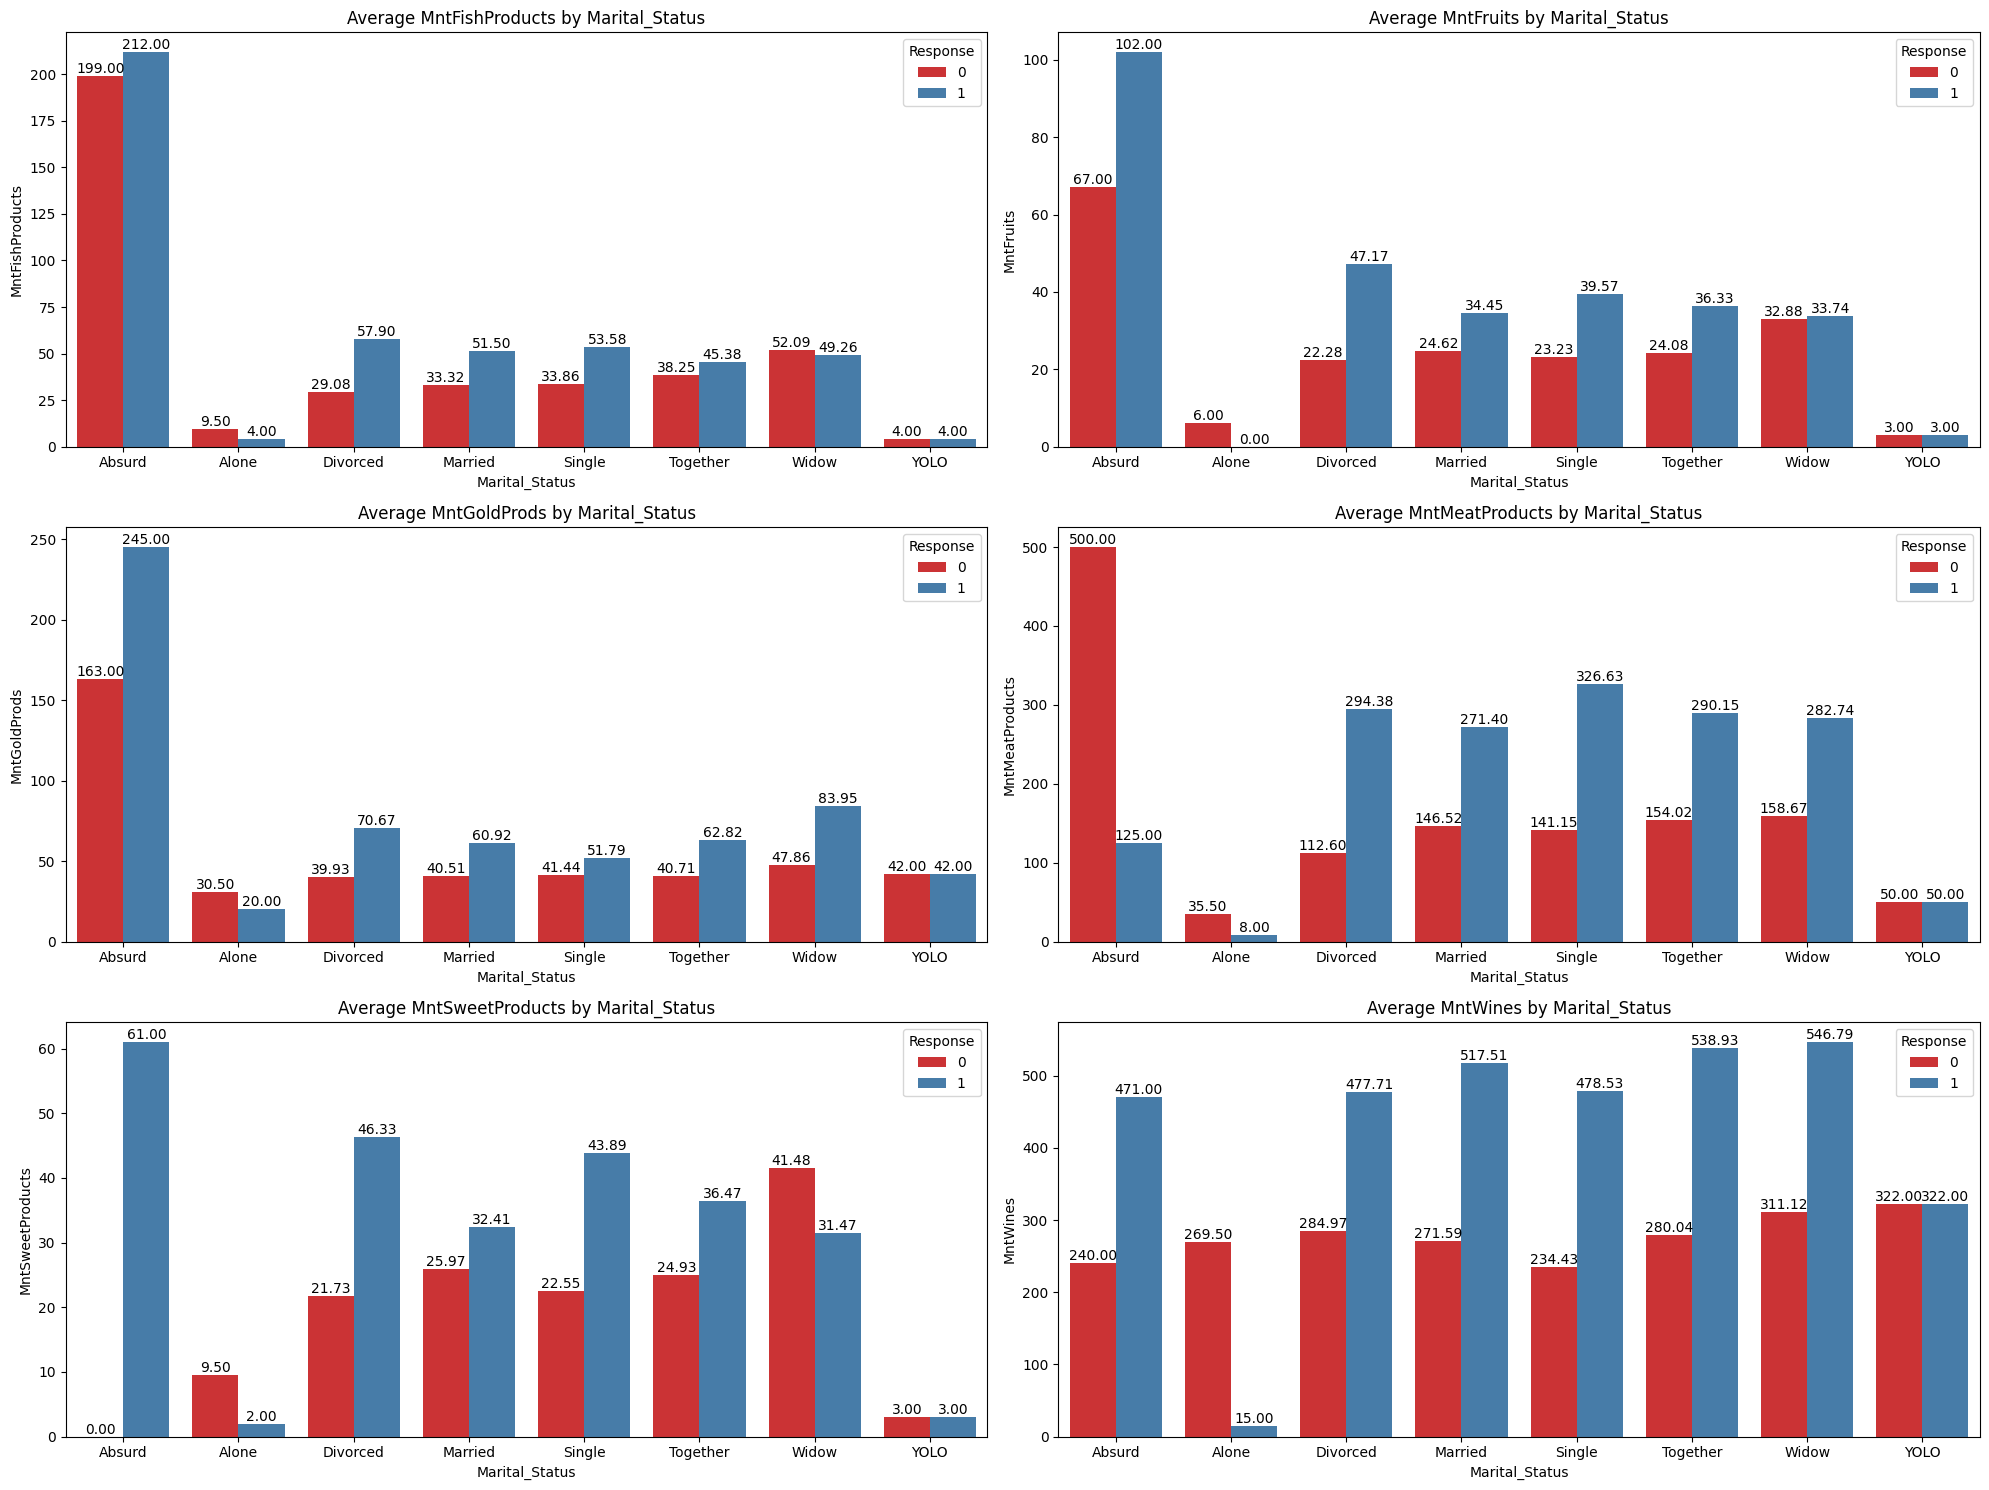

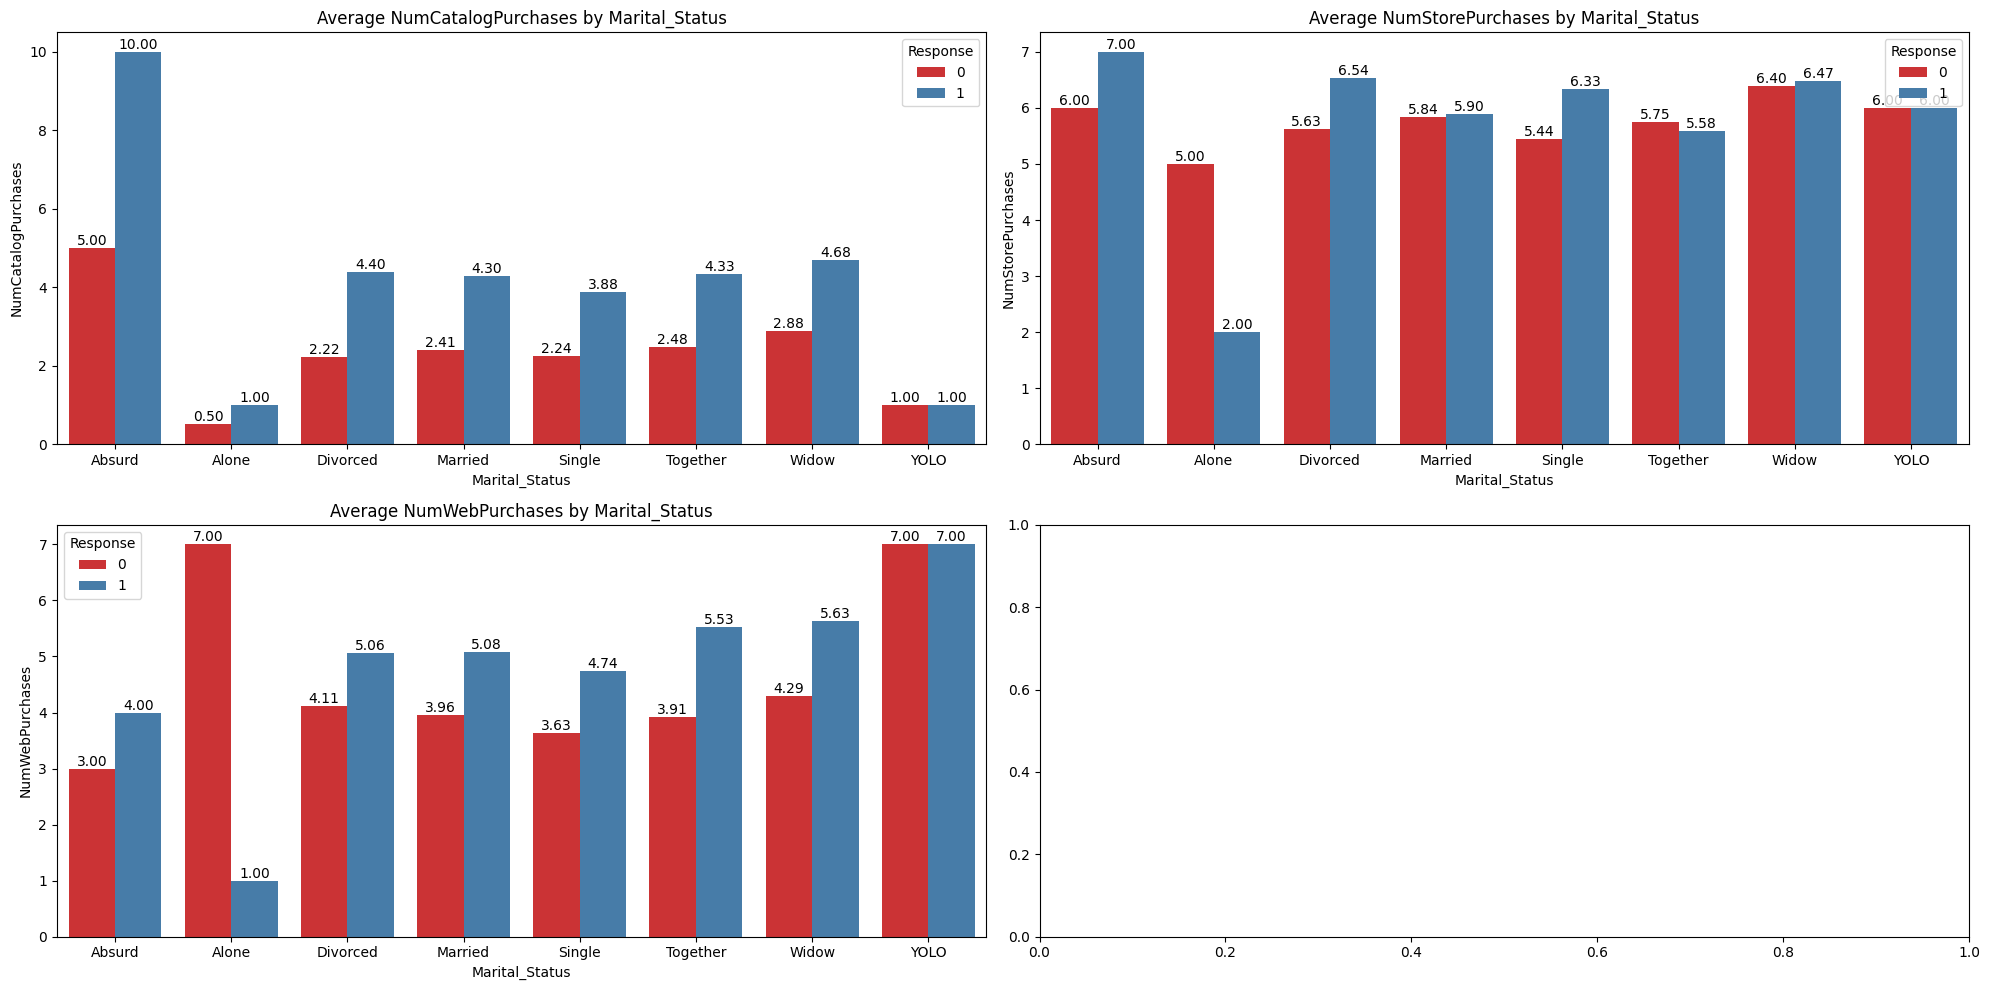

In [ ]:
# memanggil function untuk menampilkan barplot pada agregasi feature education
plot_grouped(data, 'Marital_Status', ['Income','Recency','Kidhome','Teenhome'],
             nrows=2, ncols=2, hue='Response')

plot_grouped(data, 'Marital_Status', spending_cols,
             nrows=3, ncols=2, method='mean', hue='Response')

plot_grouped(data, 'Marital_Status', ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases'],
             nrows=2, ncols=2, method='mean', hue='Response')

### **3.4.1 Summary** <a id=3.4.1></a>

Berdasarkan analisis mendalam terhadap data kampanye dan karakteristik pelanggan, kami menyarankan beberapa langkah strategis untuk meningkatkan efektivitas kampanye dan memaksimalkan keuntungan bisnis:

1. Segmentasi Pelanggan Berdasarkan Respons Kampanye:

   Melakukan segmentasi pelanggan berdasarkan respons kampanye dapat membantu dalam menyesuaikan strategi pemasaran. Fokuskan upaya pada kelompok pelanggan yang telah menunjukkan respons positif, seperti tingkat pendidikan Graduation, PhD, dan Master, serta status pernikahan Single, Married, dan Divorced.
2. Personalisasi Pesan dan Penawaran:

   Personalisasi pesan dan penawaran kampanye untuk setiap kelompok pelanggan yang telah diidentifikasi dapat meningkatkan keterlibatan. Berdasarkan karakteristik unik dari setiap kelompok, buatlah pesan yang relevan dan tawarkan insentif yang sesuai dengan preferensi mereka.
3. Penargetan Tingkat Pendidikan Tinggi:

   Tingkat pendidikan tinggi seperti Graduation, PhD, dan Master memiliki potensi besar untuk respons kampanye. Fokuskan penawaran khusus, informasi produk, dan keuntungan tambahan pada kelompok ini untuk memaksimalkan partisipasi.
4. Optimalkan Pengeluaran Pelanggan yang Merespon:

   Pelanggan yang merespons kampanye memiliki kecenderungan pengeluaran yang lebih tinggi pada berbagai kategori produk. Optimalisasi persediaan dan promosi pada produk-produk yang paling diminati oleh kelompok pelanggan ini dapat meningkatkan nilai transaksi.
5. Perkuat Kampanye dengan Data Pembelian dan Channel:

   Analisis menunjukkan bahwa pelanggan yang merespons kampanye memiliki rata-rata pembelian yang lebih tinggi di berbagai saluran seperti catalog, web, dan toko fisik. Penguatan kampanye dengan peningkatan ketersediaan produk melalui saluran ini dapat meningkatkan aksesibilitas produk bagi pelanggan.
6. Pemantauan Terus-Menerus dan Analisis Reaksi Pelanggan:

   Melakukan pemantauan terus-menerus terhadap respons pelanggan dan melakukan analisis lebih lanjut terhadap perubahan tren dan preferensi. Keterlibatan yang berkelanjutan dan penyesuaian cepat terhadap dinamika pasar dapat menjadi kunci kesuksesan jangka panjang.

Dengan menerapkan strategi ini, diharapkan perusahaan dapat meraih keberhasilan yang lebih besar dalam kampanye pemasaran, meningkatkan loyalitas pelanggan, dan mengoptimalkan hasil bisnis secara keseluruhan.

# **4. Data Pre-Processing** <a id=4></a>
[back to top](#100)

## **4.1 Handling Missing Values** <a id=4.1></a>

In [ ]:
# code here

## **4.2 Handling Duplicates Values** <a id=4.2></a>

In [ ]:
# code here

## **4.3 Handling Outliers** <a id=4.3></a>

In [ ]:
# code here

## **4.4 Feature Extraction** <a id=4.4></a>

In [ ]:
# code here

## **4.5 Feature Transformation** <a id=4.5></a>

In [ ]:
# code here

## **4.6 Feature Selection** <a id=4.6></a>

In [ ]:
# code here

# **5. Machine Learning Modelling & Evaluation** <a id=5></a>
[back to top](#100)

## **5.1 Modelling** <a id=5.1></a>

In [ ]:
# code here

## **5.2 Evaluation** <a id=5.2></a>

In [ ]:
# code here

# **6. Summary** <a id=6></a>
[back to top](#100)